In [ ]:
import pandas as pd
from scipy.stats import t
import numpy as np
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/hotel_bookings.csv")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if "is_canceled" in num_cols:
    num_cols.remove("is_canceled")

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

# EDA

## Анализ структуры данных

In [ ]:
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

In [ ]:
display(df.describe())

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Предобработка

In [ ]:
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'], format='mixed')

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
reservation_status_date                0
dtype: int64

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix['is_canceled'].sort_values(ascending=False))

is_canceled                       1.000000
lead_time                         0.293123
previous_cancellations            0.110133
adults                            0.060017
days_in_waiting_list              0.054186
adr                               0.047557
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
children                          0.005048
stays_in_weekend_nights          -0.001791
arrival_date_day_of_month        -0.006130
company                          -0.020642
babies                           -0.032491
previous_bookings_not_canceled   -0.057358
agent                            -0.083114
is_repeated_guest                -0.084793
booking_changes                  -0.144381
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
Name: is_canceled, dtype: float64


In [ ]:
# много пропусков и очень слабые кореляций с таргетом
df.drop(['agent','company'], axis=1, inplace=True)

In [ ]:
mode_children = df['children'].mode()[0]
df['children'] = df['children'].fillna(mode_children)

In [ ]:
df = df[~((df.adults == 0) & (df.children == 0) & (df.babies == 0))]

In [ ]:
df.shape

(119210, 30)

## Однофакторный анализ

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

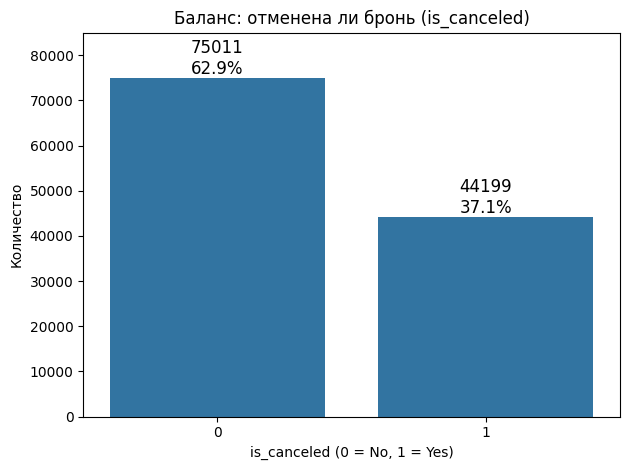

In [ ]:
plt.figure()
ax = sns.countplot(data=df, x='is_canceled')
total = len(df)
ax.set_ylim(0, 85000)
for p in ax.patches:
    cnt = int(p.get_height())
    ax.annotate(f'{cnt}\n{cnt/total:.1%}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=12)
ax.set_title('Баланс: отменена ли бронь (is_canceled)')
ax.set_xlabel('is_canceled (0 = No, 1 = Yes)')
ax.set_ylabel('Количество')
plt.tight_layout()
plt.show()

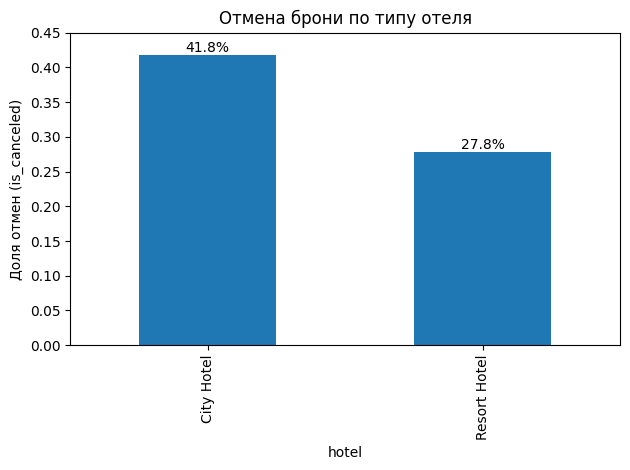

In [ ]:
rates = df.groupby('hotel')['is_canceled'].mean().sort_values(ascending=False)
plt.figure()
ax = rates.plot(kind='bar')
ax.set_ylabel('Доля отмен (is_canceled)')
ax.set_title('Отмена брони по типу отеля')
ax.set_ylim(0, 0.45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom')
plt.tight_layout()
plt.show()

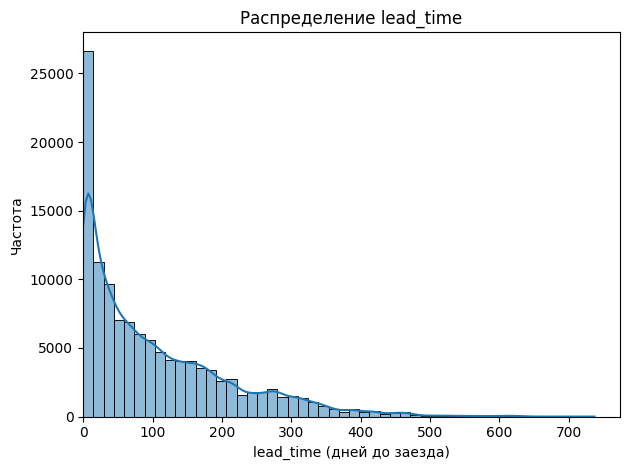

In [ ]:
plt.figure()
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Распределение lead_time')
plt.xlabel('lead_time (дней до заезда)')
plt.ylabel('Частота')
plt.xlim(left=0)
plt.tight_layout()
plt.show()

## Многофакторный анализ

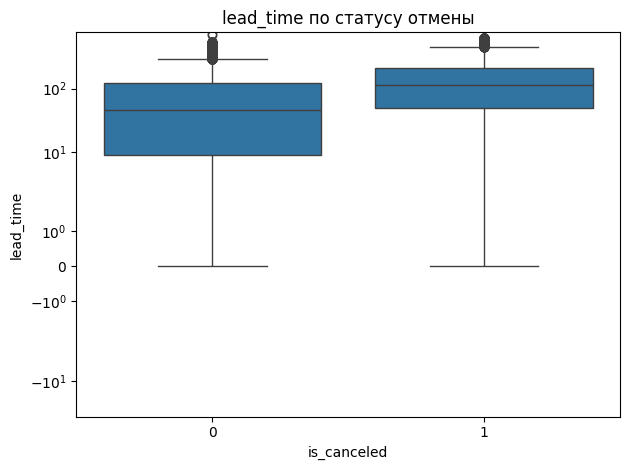

In [ ]:
plt.figure()
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.yscale('symlog')
plt.title('lead_time по статусу отмены')
plt.xlabel('is_canceled')
plt.ylabel('lead_time')
plt.tight_layout()
plt.show()

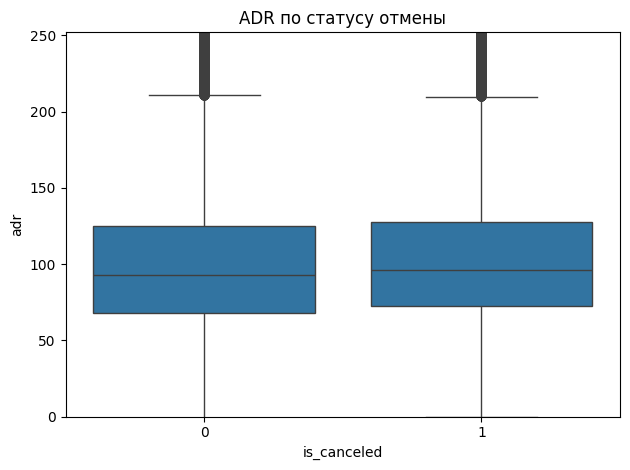

In [ ]:
plt.figure()
sns.boxplot(data=df, x='is_canceled', y='adr')
plt.ylim(0, np.percentile(df['adr'].clip(lower=0), 99))
plt.title('ADR по статусу отмены')
plt.xlabel('is_canceled')
plt.ylabel('adr')
plt.tight_layout()
plt.show()

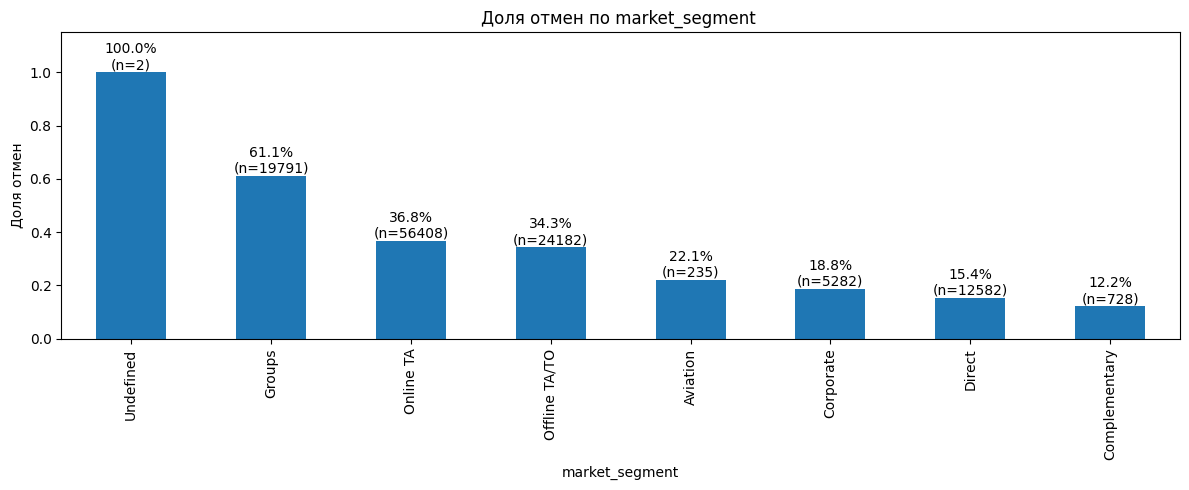

In [ ]:
seg = df.groupby('market_segment')['is_canceled'].agg(['mean','count']).sort_values('mean', ascending=False)
plt.figure(figsize=(12,5))
ax = (seg['mean']).plot(kind='bar')
ax.set_ylabel('Доля отмен')
ax.set_title('Доля отмен по market_segment ')
ax.set_ylim(0, 1.15)
for i,p in enumerate(ax.patches):
    cnt = seg['count'].iloc[i]
    ax.annotate(f'{p.get_height():.1%}\n(n={cnt})', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


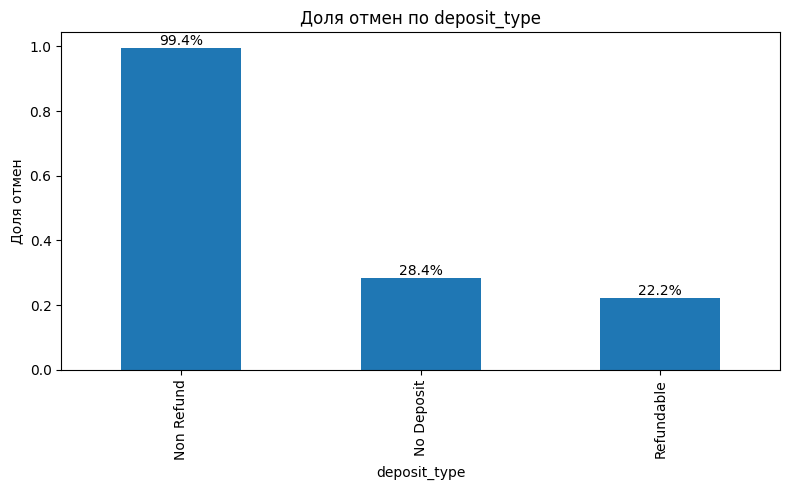

In [ ]:
dep = df.groupby(['deposit_type','is_canceled']).size().unstack(fill_value=0)
dep_pct = dep.div(dep.sum(axis=1), axis=0)
plt.figure(figsize=(8,5))
dep_pct[1].sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Доля отмен')
plt.title('Доля отмен по deposit_type')
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():.1%}', (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

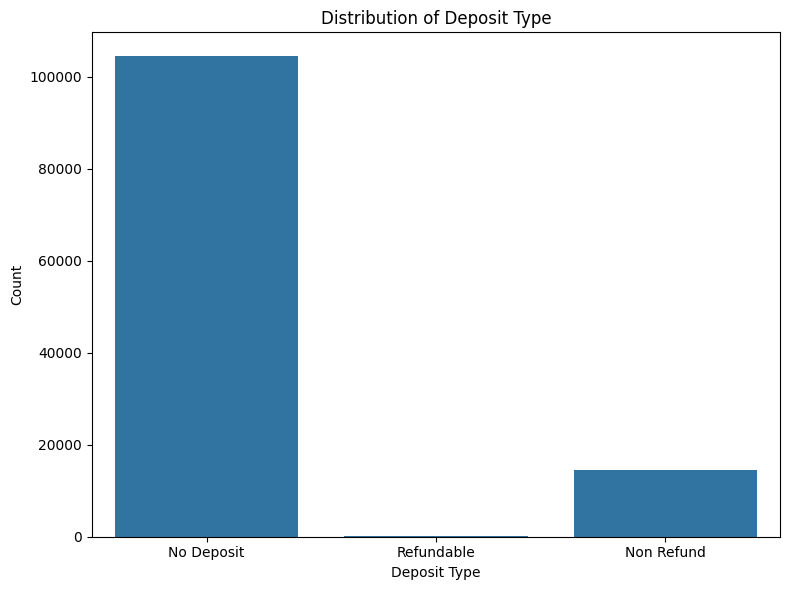

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='deposit_type')
plt.title('Distribution of Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

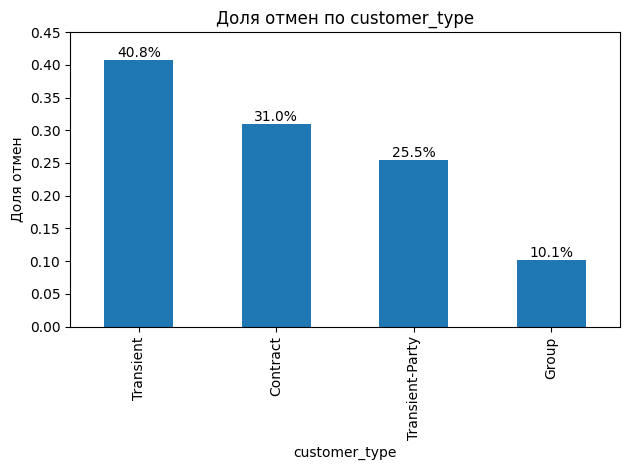

In [ ]:
ct = df.groupby('customer_type')['is_canceled'].mean().sort_values(ascending=False)
plt.figure()
ax = ct.plot(kind='bar')
ax.set_ylabel('Доля отмен')
ax.set_title('Доля отмен по customer_type')
ax.set_ylim(0, 0.45)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x()+p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

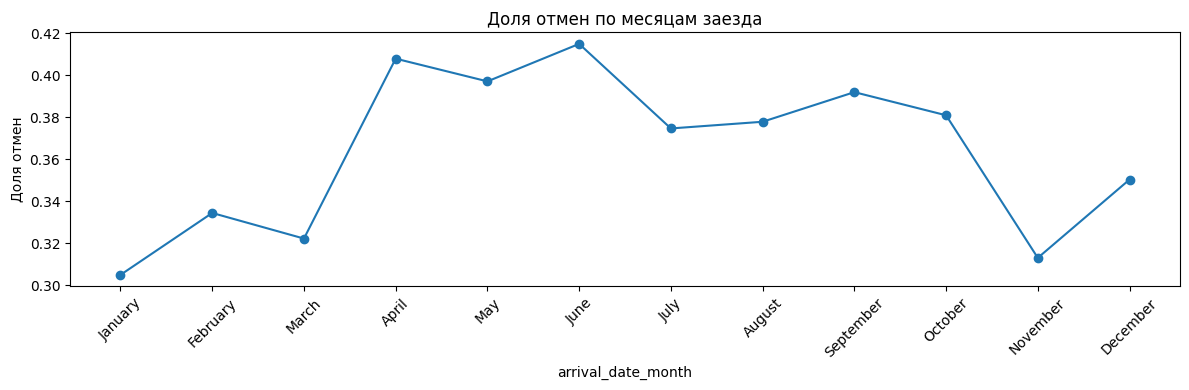

In [ ]:
months_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
month_rates = df.groupby('arrival_date_month')['is_canceled'].mean().reindex(months_order)
plt.figure(figsize=(12,4))
ax = month_rates.plot(marker='o')
ax.set_ylabel('Доля отмен')
ax.set_title('Доля отмен по месяцам заезда')
ax.set_xticks(range(len(months_order)))
ax.set_xticklabels(months_order, rotation=45)
plt.tight_layout()
plt.show()

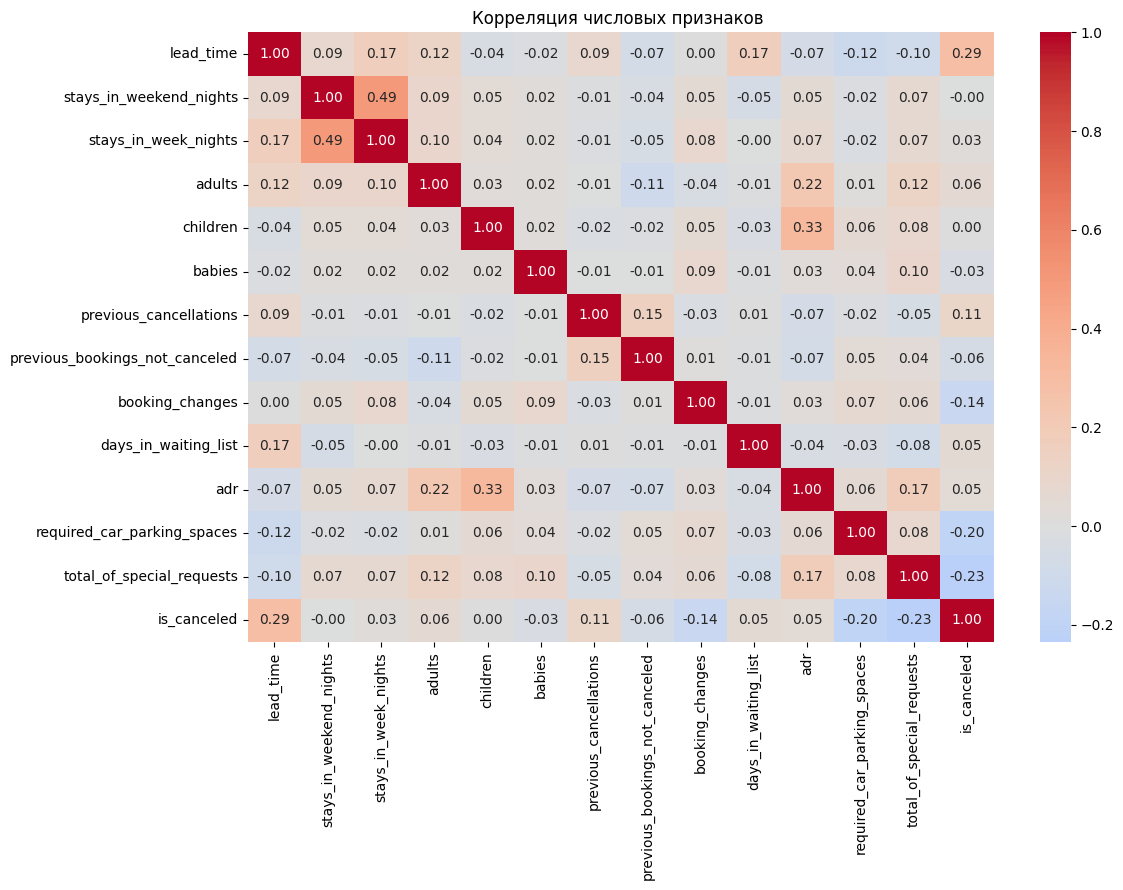

In [ ]:
num_cols = ['lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies',
            'previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list',
            'adr','required_car_parking_spaces','total_of_special_requests']
num_cols = [c for c in num_cols if c in df.columns]
corr = df[num_cols + ['is_canceled']].corr()
plt.figure(figsize=(12,9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляция числовых признаков ')
plt.tight_layout()
plt.show()

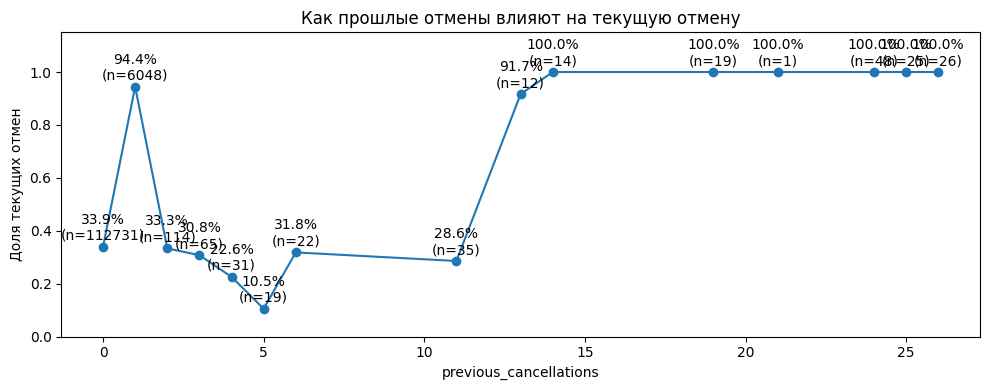

In [ ]:
pc = df.groupby('previous_cancellations')['is_canceled'].agg(['mean','count']).sort_index()
plt.figure(figsize=(10,4))
ax = pc['mean'].plot(marker='o')
ax.set_xlabel('previous_cancellations')
ax.set_ylabel('Доля текущих отмен')
ax.set_title('Как прошлые отмены влияют на текущую отмену')
ax.set_ylim(0, 1.15)
for i,(x,y) in enumerate(pc['mean'].items()):
    ax.annotate(f'{y:.1%}\n(n={pc["count"].iloc[i]})', (x, y), xytext=(0,5), textcoords='offset points', ha='center')
plt.tight_layout()
plt.show()

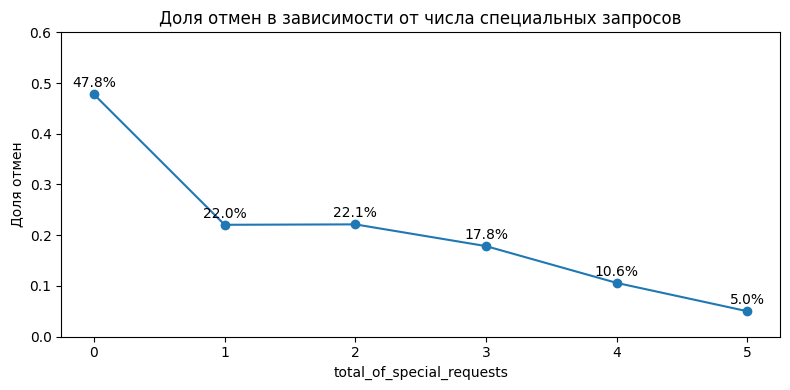

In [ ]:
tos = df.groupby('total_of_special_requests')['is_canceled'].agg(['mean','count']).sort_index()
plt.figure(figsize=(8,4))
ax = tos['mean'].plot(marker='o')
ax.set_xlabel('total_of_special_requests')
ax.set_ylabel('Доля отмен')
ax.set_title('Доля отмен в зависимости от числа специальных запросов')
ax.set_ylim(0, 0.6)
for i,(x,y) in enumerate(tos['mean'].items()):
    ax.annotate(f'{y:.1%}', (x, y), xytext=(0,5), textcoords='offset points', ha='center')
plt.tight_layout()
plt.show()

# Бейзлайн

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             RocCurveDisplay, ConfusionMatrixDisplay)
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
TARGET = 'is_canceled'

# Удаляем явные утечки
for leak in ['reservation_status', 'reservation_status_date']:
    if leak in df.columns:
        df = df.drop(columns=[leak])

In [ ]:
# Разделение признаков по типу
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if TARGET in num_cols:
    num_cols.remove(TARGET)
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print(f"Числовые признаки ({len(num_cols)}): {num_cols[:8]}{'...' if len(num_cols)>8 else ''}")
print(f"Категориальные признаки ({len(cat_cols)}): {cat_cols[:8]}{'...' if len(cat_cols)>8 else ''}")

# Стратифицированный сплит
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Числовые признаки (17): ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children']...
Категориальные признаки (10): ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type']...
Train: (89407, 27) Test: (29803, 27)


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')  # оставшиеся признаки опущены

In [ ]:
def evaluate_model(pipe, X_test, y_test, plot_title_prefix="Model"):
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  AUC: {auc if auc is None else f'{auc:.4f}'}")
    print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

    # ROC
    if y_proba is not None:
        plt.figure()
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f"{plot_title_prefix} — ROC")
        plt.show()

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    ConfusionMatrixDisplay(cm, display_labels=['not_canceled','canceled']).plot(cmap='Blues', values_format='d')
    plt.title(f"{plot_title_prefix} — Confusion Matrix")
    plt.show()

## Логистическая регрессия

Logistic Regression
Accuracy: 0.7784  Precision: 0.6878  Recall: 0.7367  F1: 0.7114  AUC: 0.8635

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82     18753
           1       0.69      0.74      0.71     11050

    accuracy                           0.78     29803
   macro avg       0.76      0.77      0.77     29803
weighted avg       0.78      0.78      0.78     29803



<Figure size 640x480 with 0 Axes>

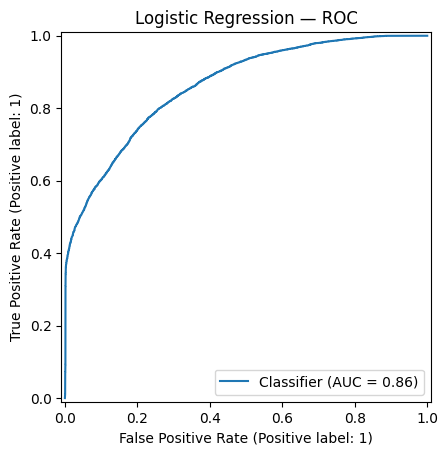

<Figure size 640x480 with 0 Axes>

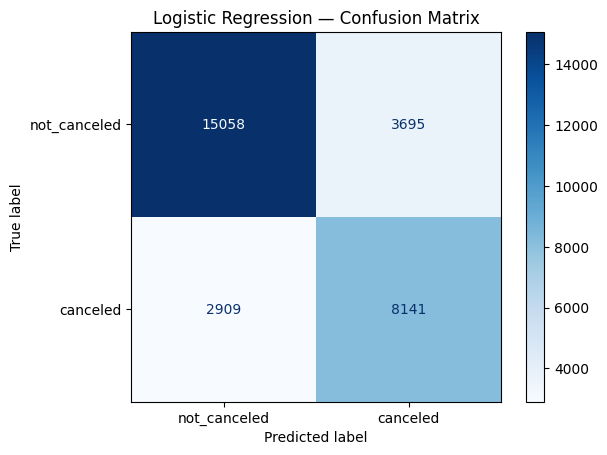

In [ ]:
lr = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42, n_jobs=-1))
])
lr.fit(X_train, y_train)
print("Logistic Regression")
evaluate_model(lr, X_test, y_test, plot_title_prefix="Logistic Regression")

## Случайный лес

Random Forest обучен — метрики на тесте:
Accuracy: 0.8889  Precision: 0.8799  Recall: 0.8110  F1: 0.8440  AUC: 0.9558

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     18753
           1       0.88      0.81      0.84     11050

    accuracy                           0.89     29803
   macro avg       0.89      0.87      0.88     29803
weighted avg       0.89      0.89      0.89     29803



<Figure size 640x480 with 0 Axes>

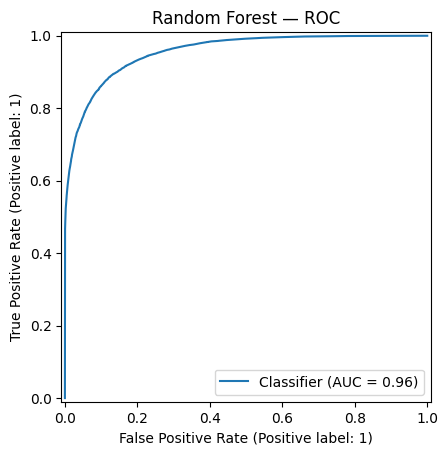

<Figure size 640x480 with 0 Axes>

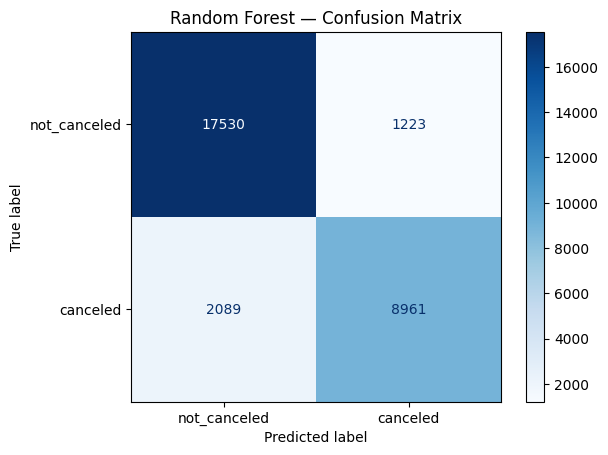

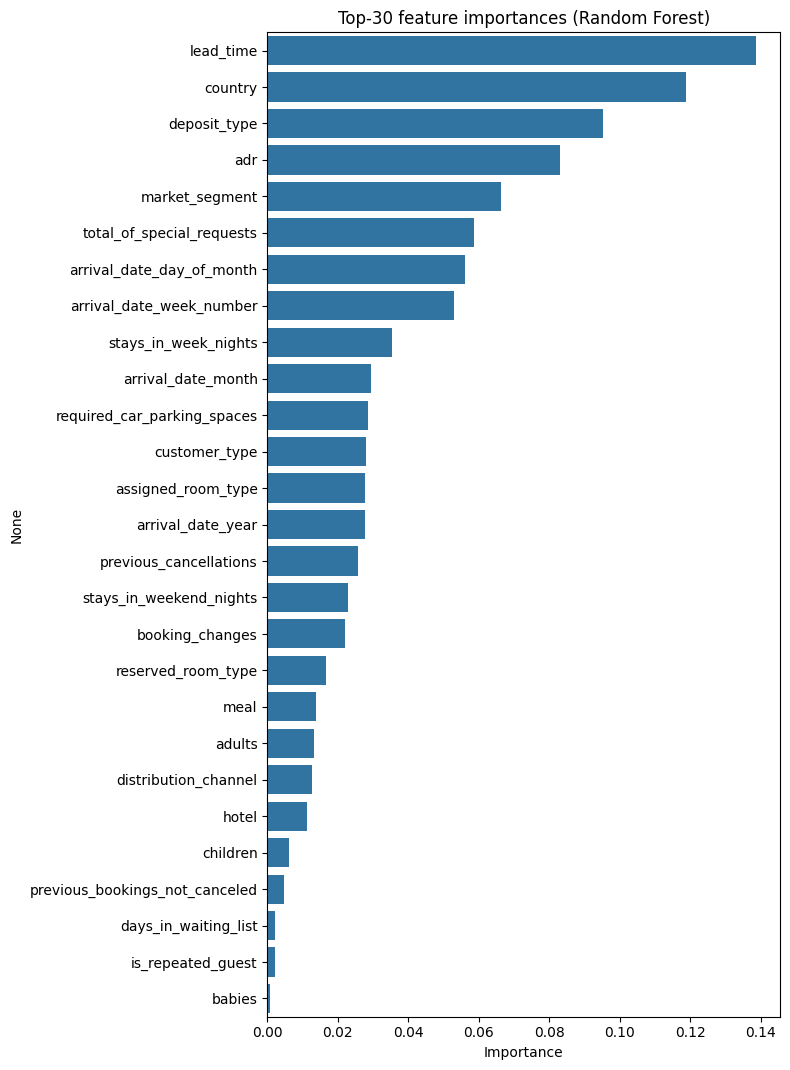

In [ ]:
rf = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced'))
])

# Обучаем
rf.fit(X_train, y_train)
print("Random Forest обучен — метрики на тесте:")
evaluate_model(rf, X_test, y_test, plot_title_prefix="Random Forest")


feature_names = num_cols + cat_cols

importances = rf.named_steps['clf'].feature_importances_

# Защита: длины должны совпадать. Если нет — создаём fallback имена.
if len(importances) != len(feature_names):
    print(f"Warning: число importances = {len(importances)} не совпадает с числом feature_names = {len(feature_names)}.")
    # Попробуем получить имена из transformers_ (на случай, если порядок другой)
    try:
        pre = rf.named_steps['pre']
        feat_names_try = []
        for (name, trans, cols) in pre.transformers_:
            # cols может быть список/масив/индексатор
            if isinstance(cols, (list, tuple, np.ndarray)):
                feat_names_try.extend(list(cols))
            else:
                # если cols - slice/boolean indexer, безопасно пропускаем
                pass
        if len(feat_names_try) == len(importances):
            feature_names = feat_names_try
            print("feature_names восстановлены из pre.transformers_.")
        else:
            # fallback: пронумеруем
            feature_names = [f"f_{i}" for i in range(len(importances))]
            print("Fallback: использованы пронумерованные имена фич.")
    except Exception as e:
        feature_names = [f"f_{i}" for i in range(len(importances))]
        print("Fallback по исключению. Exception:", e)

# Создаём Series и показываем топ-30
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(30)

plt.figure(figsize=(8, min(0.4 * len(feat_imp), 12)))  # высота зависит от числа фич в топе
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Top-30 feature importances (Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
models = {
    'Logistic': Pipeline([
        ('pre', preprocessor),
        ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1))
    ]),
    'RandomForest': Pipeline([
        ('pre', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, class_weight='balanced'))
    ])
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    auc_scores = cross_val_score(model, X, y, cv=skf, scoring='roc_auc', n_jobs=-1)
    f1_scores = cross_val_score(model, X, y, cv=skf, scoring='f1', n_jobs=-1)

    results.append({
        'model': name,
        'roc_auc_mean': auc_scores.mean(),
        'roc_auc_std': auc_scores.std(),
        'f1_mean': f1_scores.mean(),
        'f1_std': f1_scores.std()
    })

res_df = pd.DataFrame(results).sort_values('roc_auc_mean', ascending=False)

res_df.style.format({
    'roc_auc_mean': '{:.3f}',
    'roc_auc_std': '{:.3f}',
    'f1_mean': '{:.3f}',
    'f1_std': '{:.3f}'
})

/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


#Поиск аномалий

## 1. Используем статистические методы

In [ ]:
df = pd.read_csv("/content/hotel_bookings.csv")
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if "is_canceled" in num_cols:
    num_cols.remove("is_canceled")

cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

Начнем с детекции аномалий с поомщью IQR, Z-оценки и теста Граббса.

Z-оценка работает только при нормально распределенных данных, посмотрим на гистограмму наших числовых фичей:

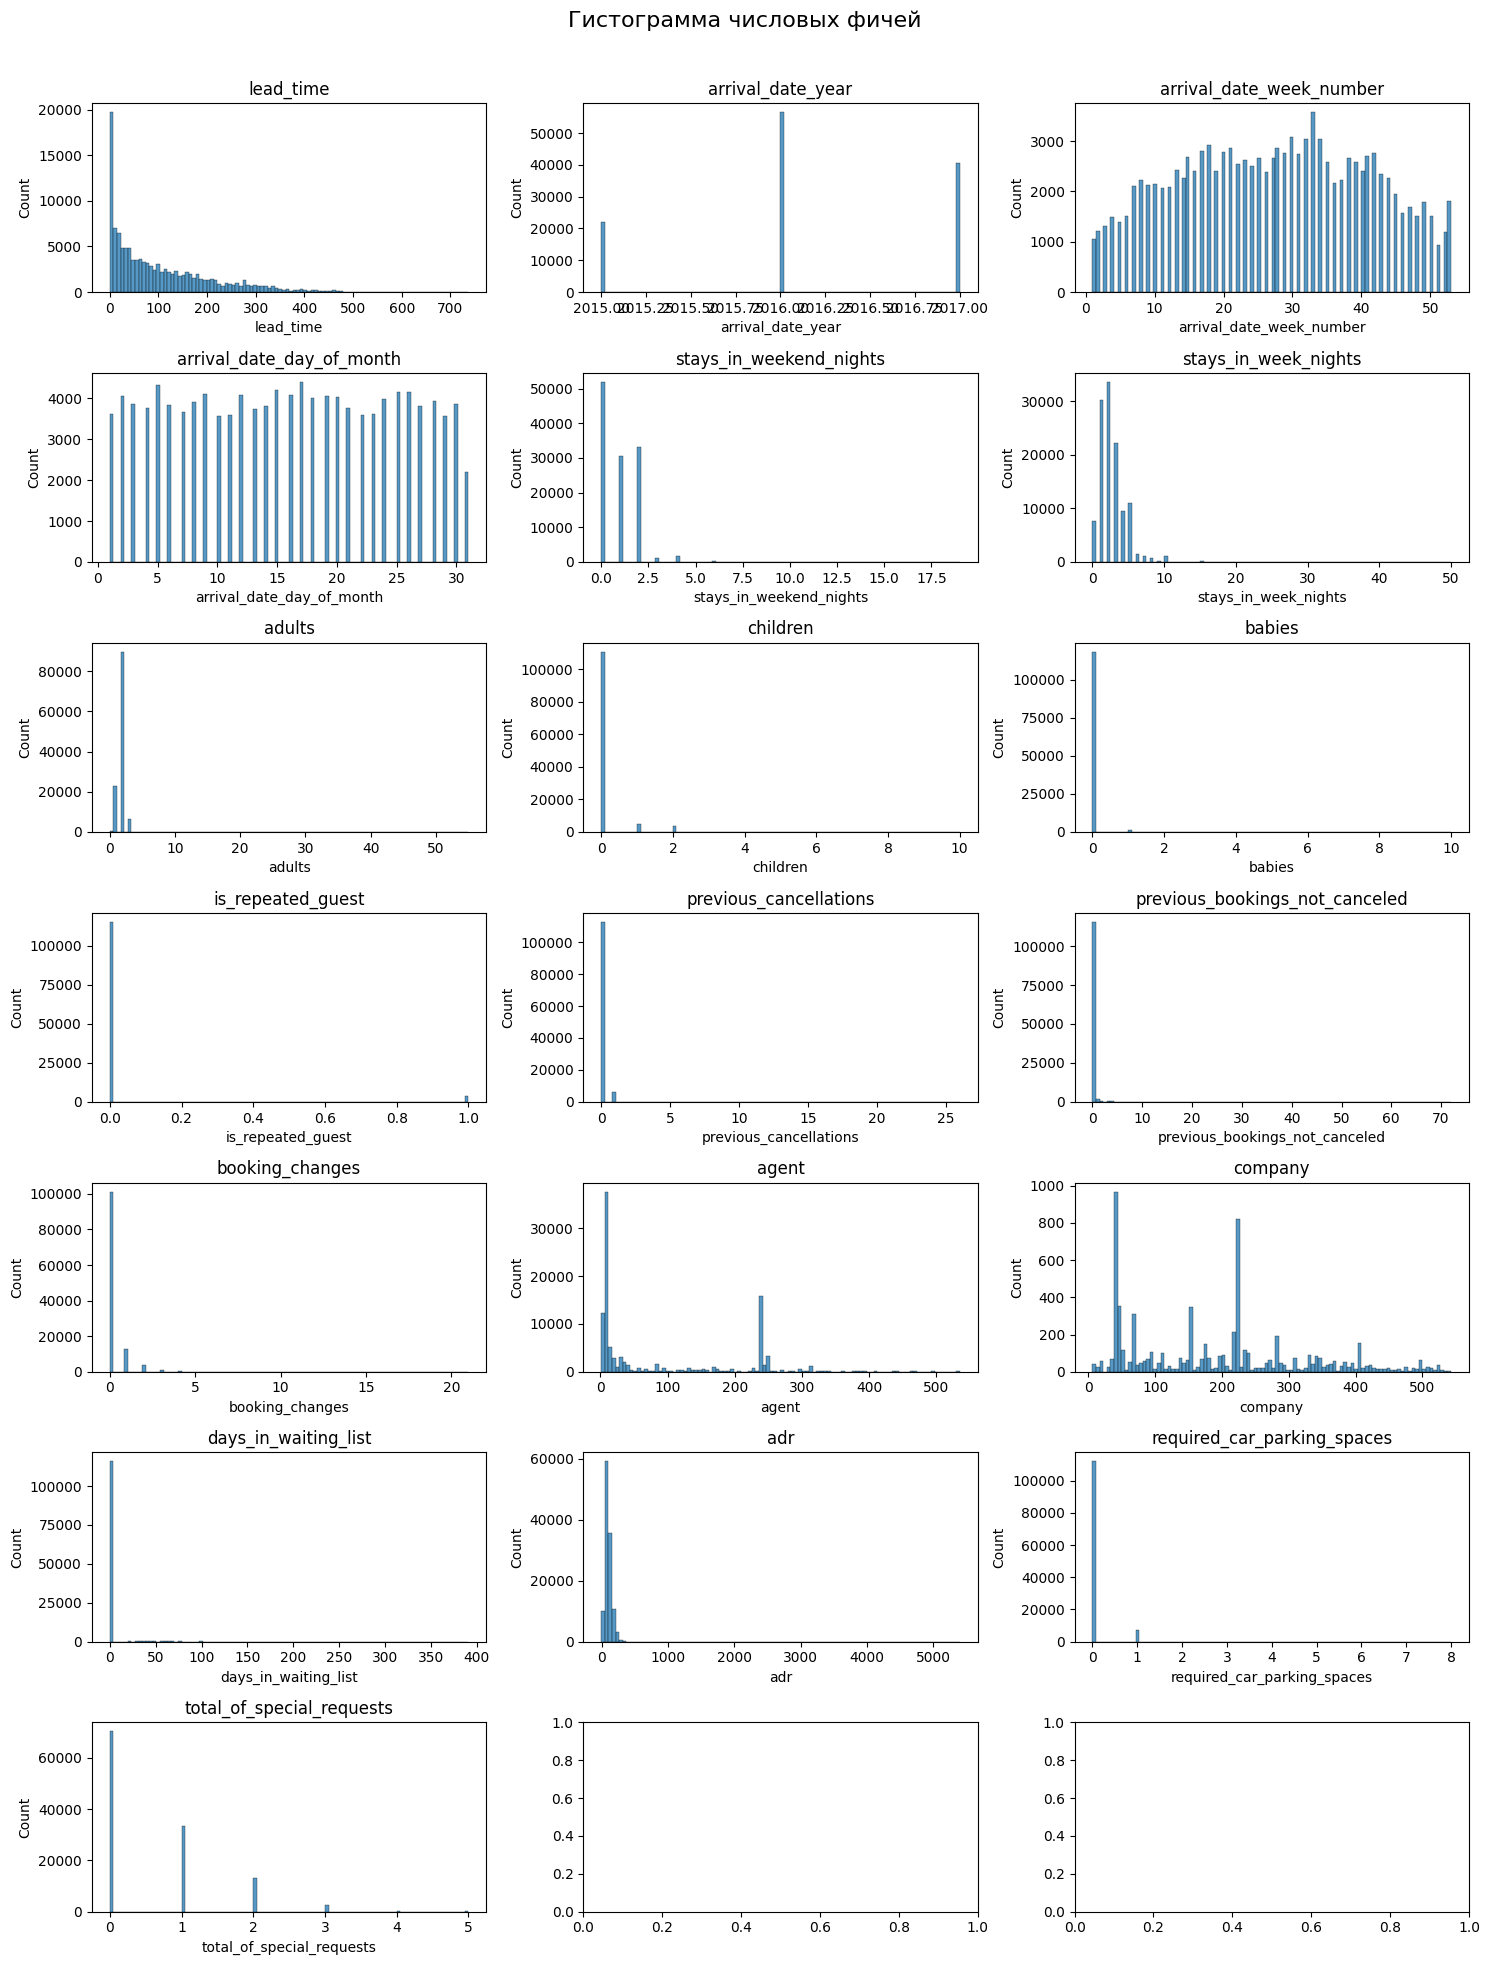

In [ ]:
n = len(num_cols)
rows = (n + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize = (15,20))
axes = axes.flatten()

for i, col in enumerate(num_cols):
  sns.histplot(df[col], ax=axes[i], kde=False, bins = 100)
  axes[i].set_title(col)

fig.suptitle("Гистограмма числовых фичей", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])

plt.show()

Видим, что только arrival_date_week_number  имеет приближенно нормальное распределение. Значит Z-оценка применима только для него.


Для каждого из методов поиска выбросов(Через IQR, Z-оценку, Тест Граббса) выявляем явялется ли строка выбросом. Создаем новые фичи с флагами является ли строка выбросом по столбцу col(1) или нет(0).

In [ ]:
from scipy.stats import zscore, t

Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

mask = (df[num_cols] < lower) | (df[num_cols] > upper)

def grubbs_outliers(series, alpha=0.05):
    x = series.dropna()
    n = len(x)
    mean_x = x.mean()
    std_x = x.std(ddof=1)
    G = np.abs(x - mean_x) / std_x
    t_crit = t.ppf(1 - alpha/(2*n), n-2)
    G_crit = ((n-1)/np.sqrt(n)) * np.sqrt(t_crit**2 / (n-2 + t_crit**2))
    return (G > G_crit).reindex(series.index, fill_value=False)

for col in num_cols:
    df[f"grubbs_{col}_out"] = grubbs_outliers(df[col]).astype(int)
    df[f"iqr_{col}_out"] = mask[col].astype(int)

z = zscore(df["arrival_date_week_number"], nan_policy="omit")
df["z_arrival_date_week_number_out"] = (np.abs(z) > 3).astype(int)


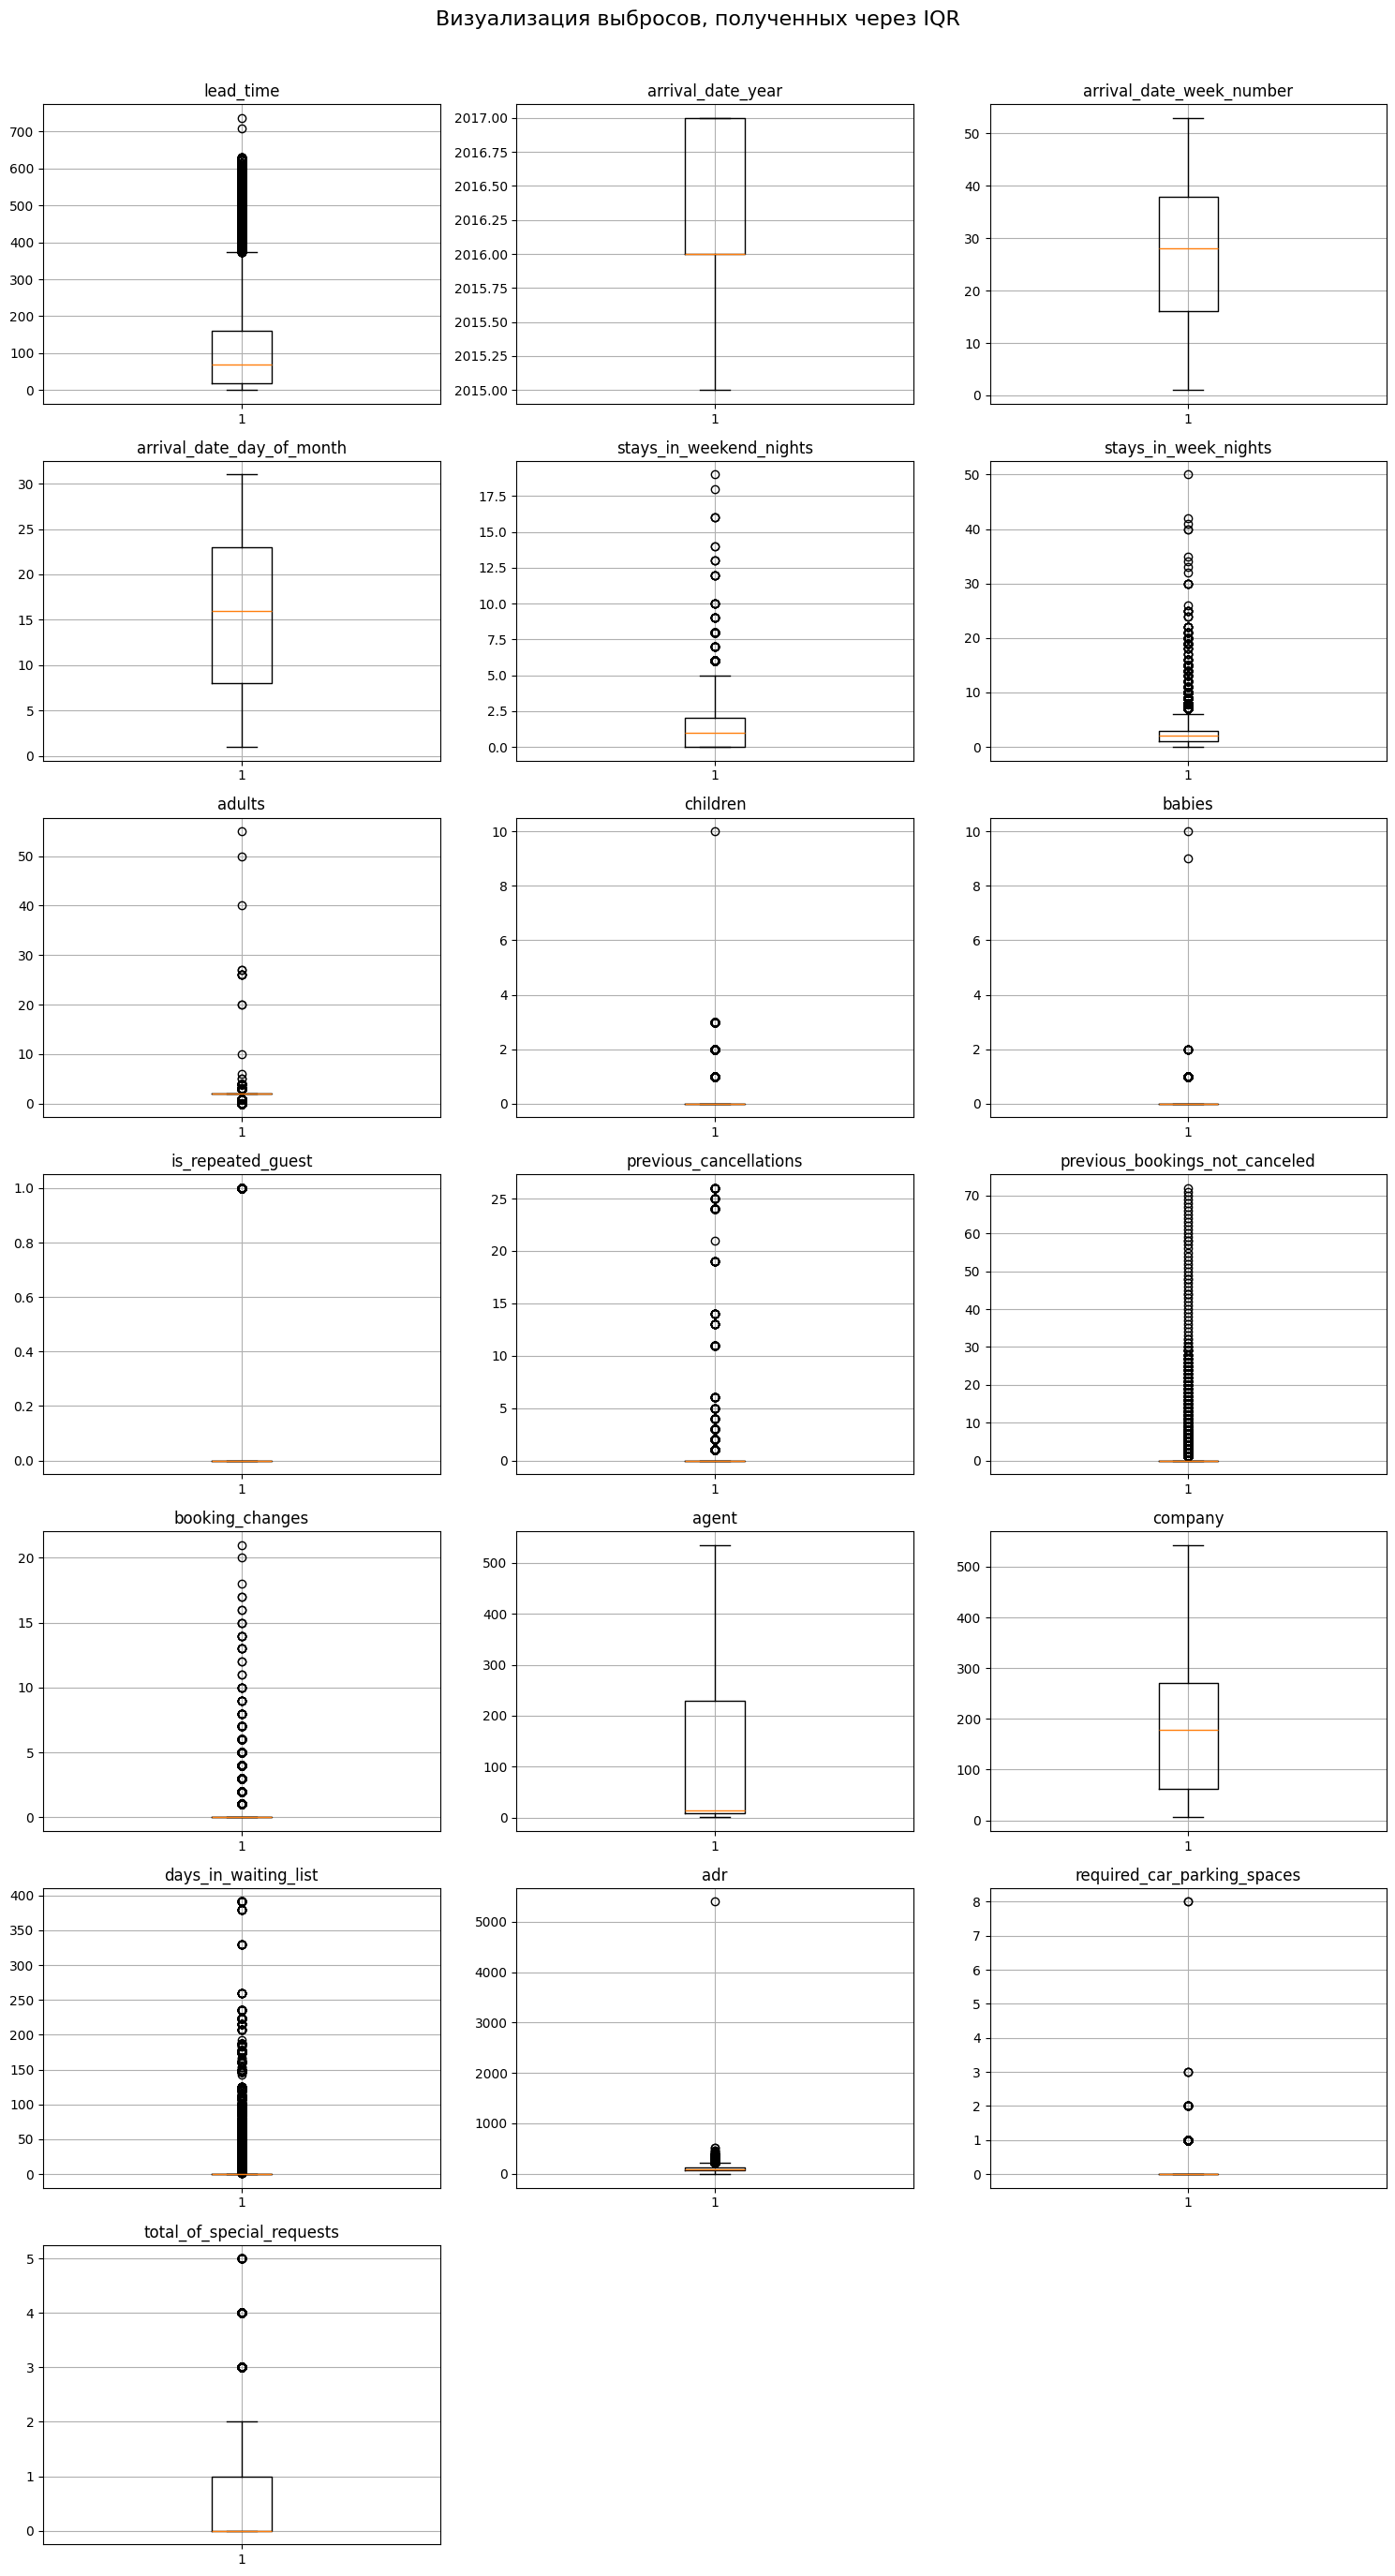

In [ ]:
n = len(num_cols)
cols_per_row = 3
rows = (n + cols_per_row - 1) // cols_per_row

fig, axes = plt.subplots(rows, cols_per_row, figsize=(5*cols_per_row, 4*rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    data = df[col].dropna()
    axes[i].boxplot(data, vert=True)
    axes[i].set_title(col)
    axes[i].grid(True)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Визуализация выбросов, полученных через IQR", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

In [ ]:
col = "arrival_date_week_number"
df[f"{col}_all_out"] = (
    df[f"iqr_{col}_out"] & df[f"grubbs_{col}_out"] & df[f"z_{col}_out"]
).astype(int)

for col in num_cols:
    if col != "arrival_date_week_number":
        df[f"{col}_all_out"] = (
            df[f"iqr_{col}_out"] & df[f"grubbs_{col}_out"]
        ).astype(int)

cols_to_drop = []
for col in num_cols:
    if col == "arrival_date_week_number":
        for suffix in ["iqr_", "grubbs_", "z_"]:
            col_name = f"{suffix}{col}_out"
            if col_name in df.columns:
                cols_to_drop.append(col_name)
    else:
        for suffix in ["iqr_", "grubbs_"]:
            col_name = f"{suffix}{col}_out"
            if col_name in df.columns:
                cols_to_drop.append(col_name)

df.drop(columns=cols_to_drop, inplace=True)


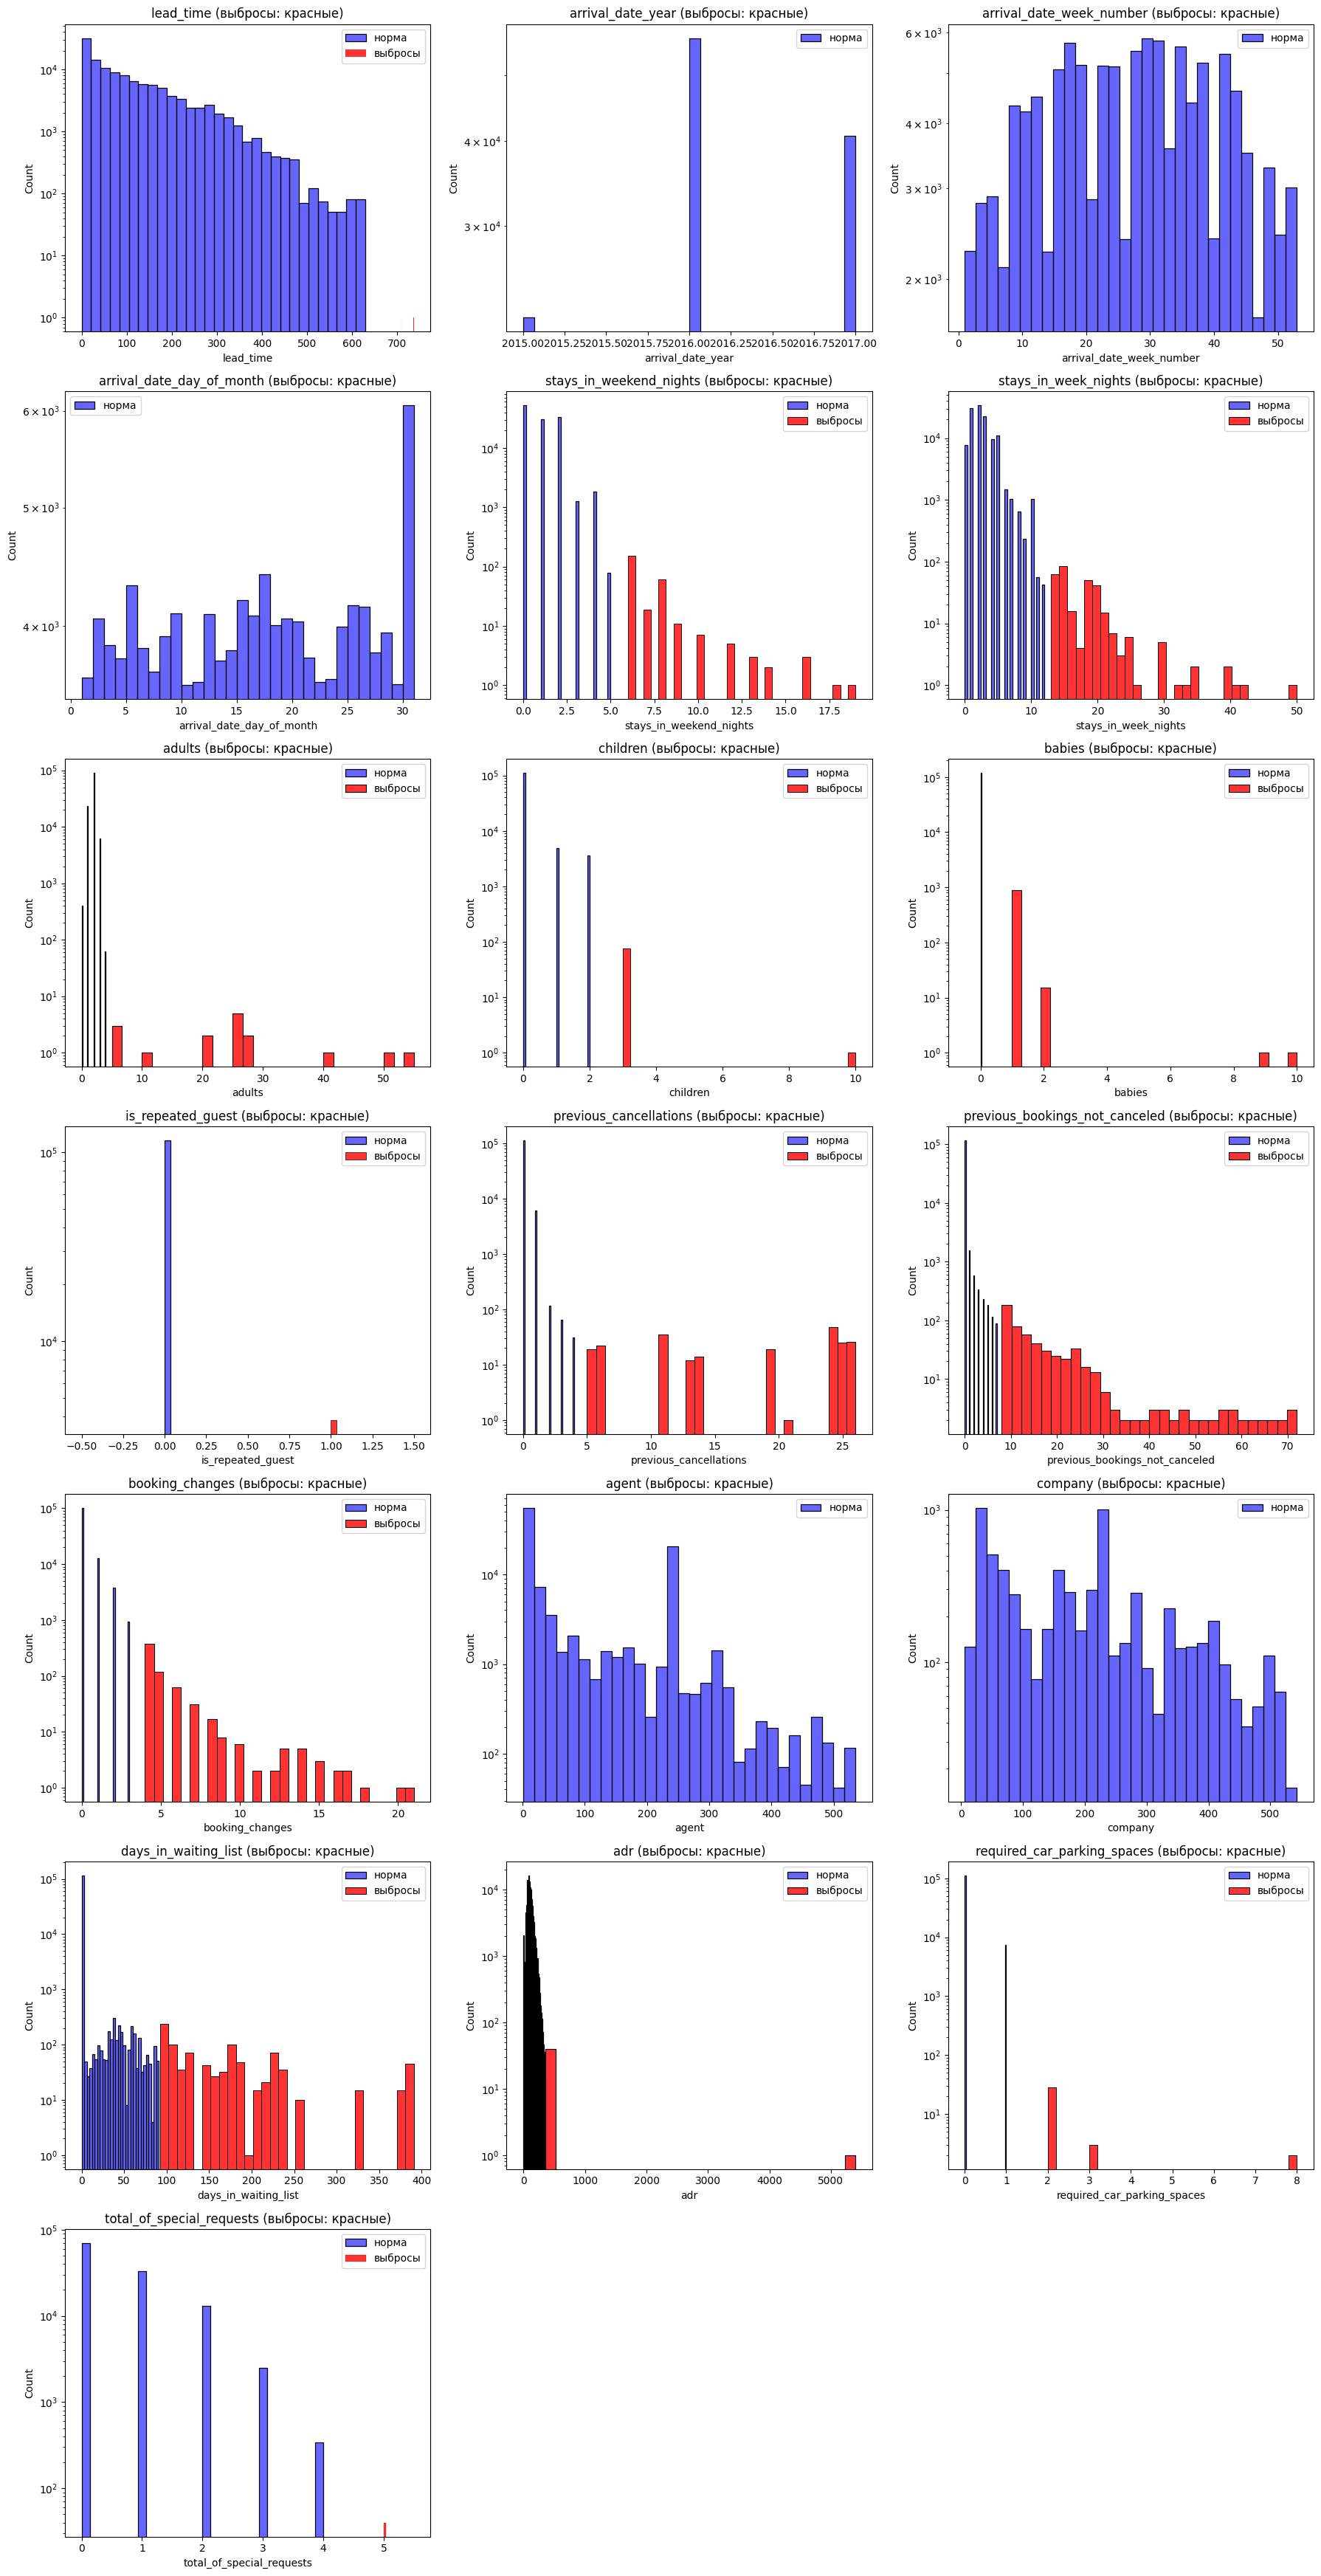

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols_with_outliers = [col for col in num_cols if f"{col}_all_out" in df.columns]

# Размер сетки
n_cols = 3
n_rows = math.ceil(len(cols_with_outliers) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cols_with_outliers, 1):
    out_flag = f"{col}_all_out"

    normal = df[df[out_flag] == 0][col]
    outliers = df[df[out_flag] == 1][col]

    ax = plt.subplot(n_rows, n_cols, i)

    sns.histplot(normal, bins=30, color='blue', alpha=0.6, label='норма', ax=ax)
    sns.histplot(outliers, bins=30, color='red', alpha=0.8, label='выбросы', ax=ax)

    ax.set_title(f"{col} (выбросы: красные)")
    ax.set_yscale("log")
    ax.legend()

plt.tight_layout()
plt.show()


Можем считать аномалиями:

- еслм человек сильно заранее бронирует номер. Большой lead_time отражает необычность мотивации брони.
- когда человек остается на ночь на большое число раз. Большая длительность — это редкое наблюдение, и модель должна понимать, что поведение этих клиентов сильно отличается от коротких туристических поездок(веротяно чел приехал в командировку).
- когда число заселяющихся взрослых большое. Это значит что приехала целая кампания людей, их поведение будет явно отличаться от поведения людей прибывающих одним или в небольшой компании. Также отметим, что случай когда у нас числов взрослых = 0 тоже аномалия,если дети бронируют отель без взросылых этот случай весьма необычен. Большие группы имеют иные паттерны поведения.
- когда числ детей/ младенцев большое.Помогает замечать редкие семейные/групповые сценарии, отличные от обычных.
- большое число специальных запросов клиента.Такие гости могут предъявлять требования выше нормы, могут нарушать статистические паттерны.

Не считаем аномалями:
- средняя ставка за ночь. Она сильно зависит от числа людей.Цена сама по себе не говорит об аномальности, имеет смысл говорить о цене на человека(в дальнейшем мы сгенерим такую фичу).
- большое число изменений статуса бронирования.Частые путешественники делают больше изменений.
- инфу что гость постоянный. Это вообще скорее бинарная фича, так как у нее флаги 0 и 1.



In [ ]:
df.drop(columns = ["previous_cancellations_all_out", "previous_bookings_not_canceled_all_out", "is_repeated_guest_all_out", "adr_all_out"], inplace=True) # удаляем флаги аномалий по фичам, где мы решили что некорректно говорить об аномалиях


 ## 2. Используем ML-методы

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

df_2 = pd.read_csv("/content/hotel_bookings.csv")

num_cols_2 = df_2.select_dtypes(include=["int64", "float64"]).columns.tolist()
for col in ["is_canceled"]:
    if col in num_cols_2:
        num_cols_2.remove(col)

X = df_2[num_cols_2].copy()
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(X.median())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso = IsolationForest(n_estimators=300, contamination='auto', random_state=42)
iso.fit(X_scaled)

df_2["iso_outlier"] = iso.predict(X_scaled)
df_2["iso_outlier"] = (df_2["iso_outlier"] == -1).astype(int)

svm = OneClassSVM(kernel="rbf", gamma="scale", nu=0.03)
svm.fit(X_scaled)

df_2["svm_outlier"] = svm.predict(X_scaled)
df_2["svm_outlier"] = (df_2["svm_outlier"] == -1).astype(int)

print(df_2["iso_outlier"].mean()) # видим, что у моделей довольео сильно отличается количество найденных выбросов
print(df_2["svm_outlier"].mean())

# добавляем предсказания этих моделей как новую фичу в исходный датасет
df["iso_outlier"] = df_2["iso_outlier"].values
df["svm_outlier"] = df_2["svm_outlier"].values

0.05832146745958623
0.02992712957534132


Теперь посмотри на вс

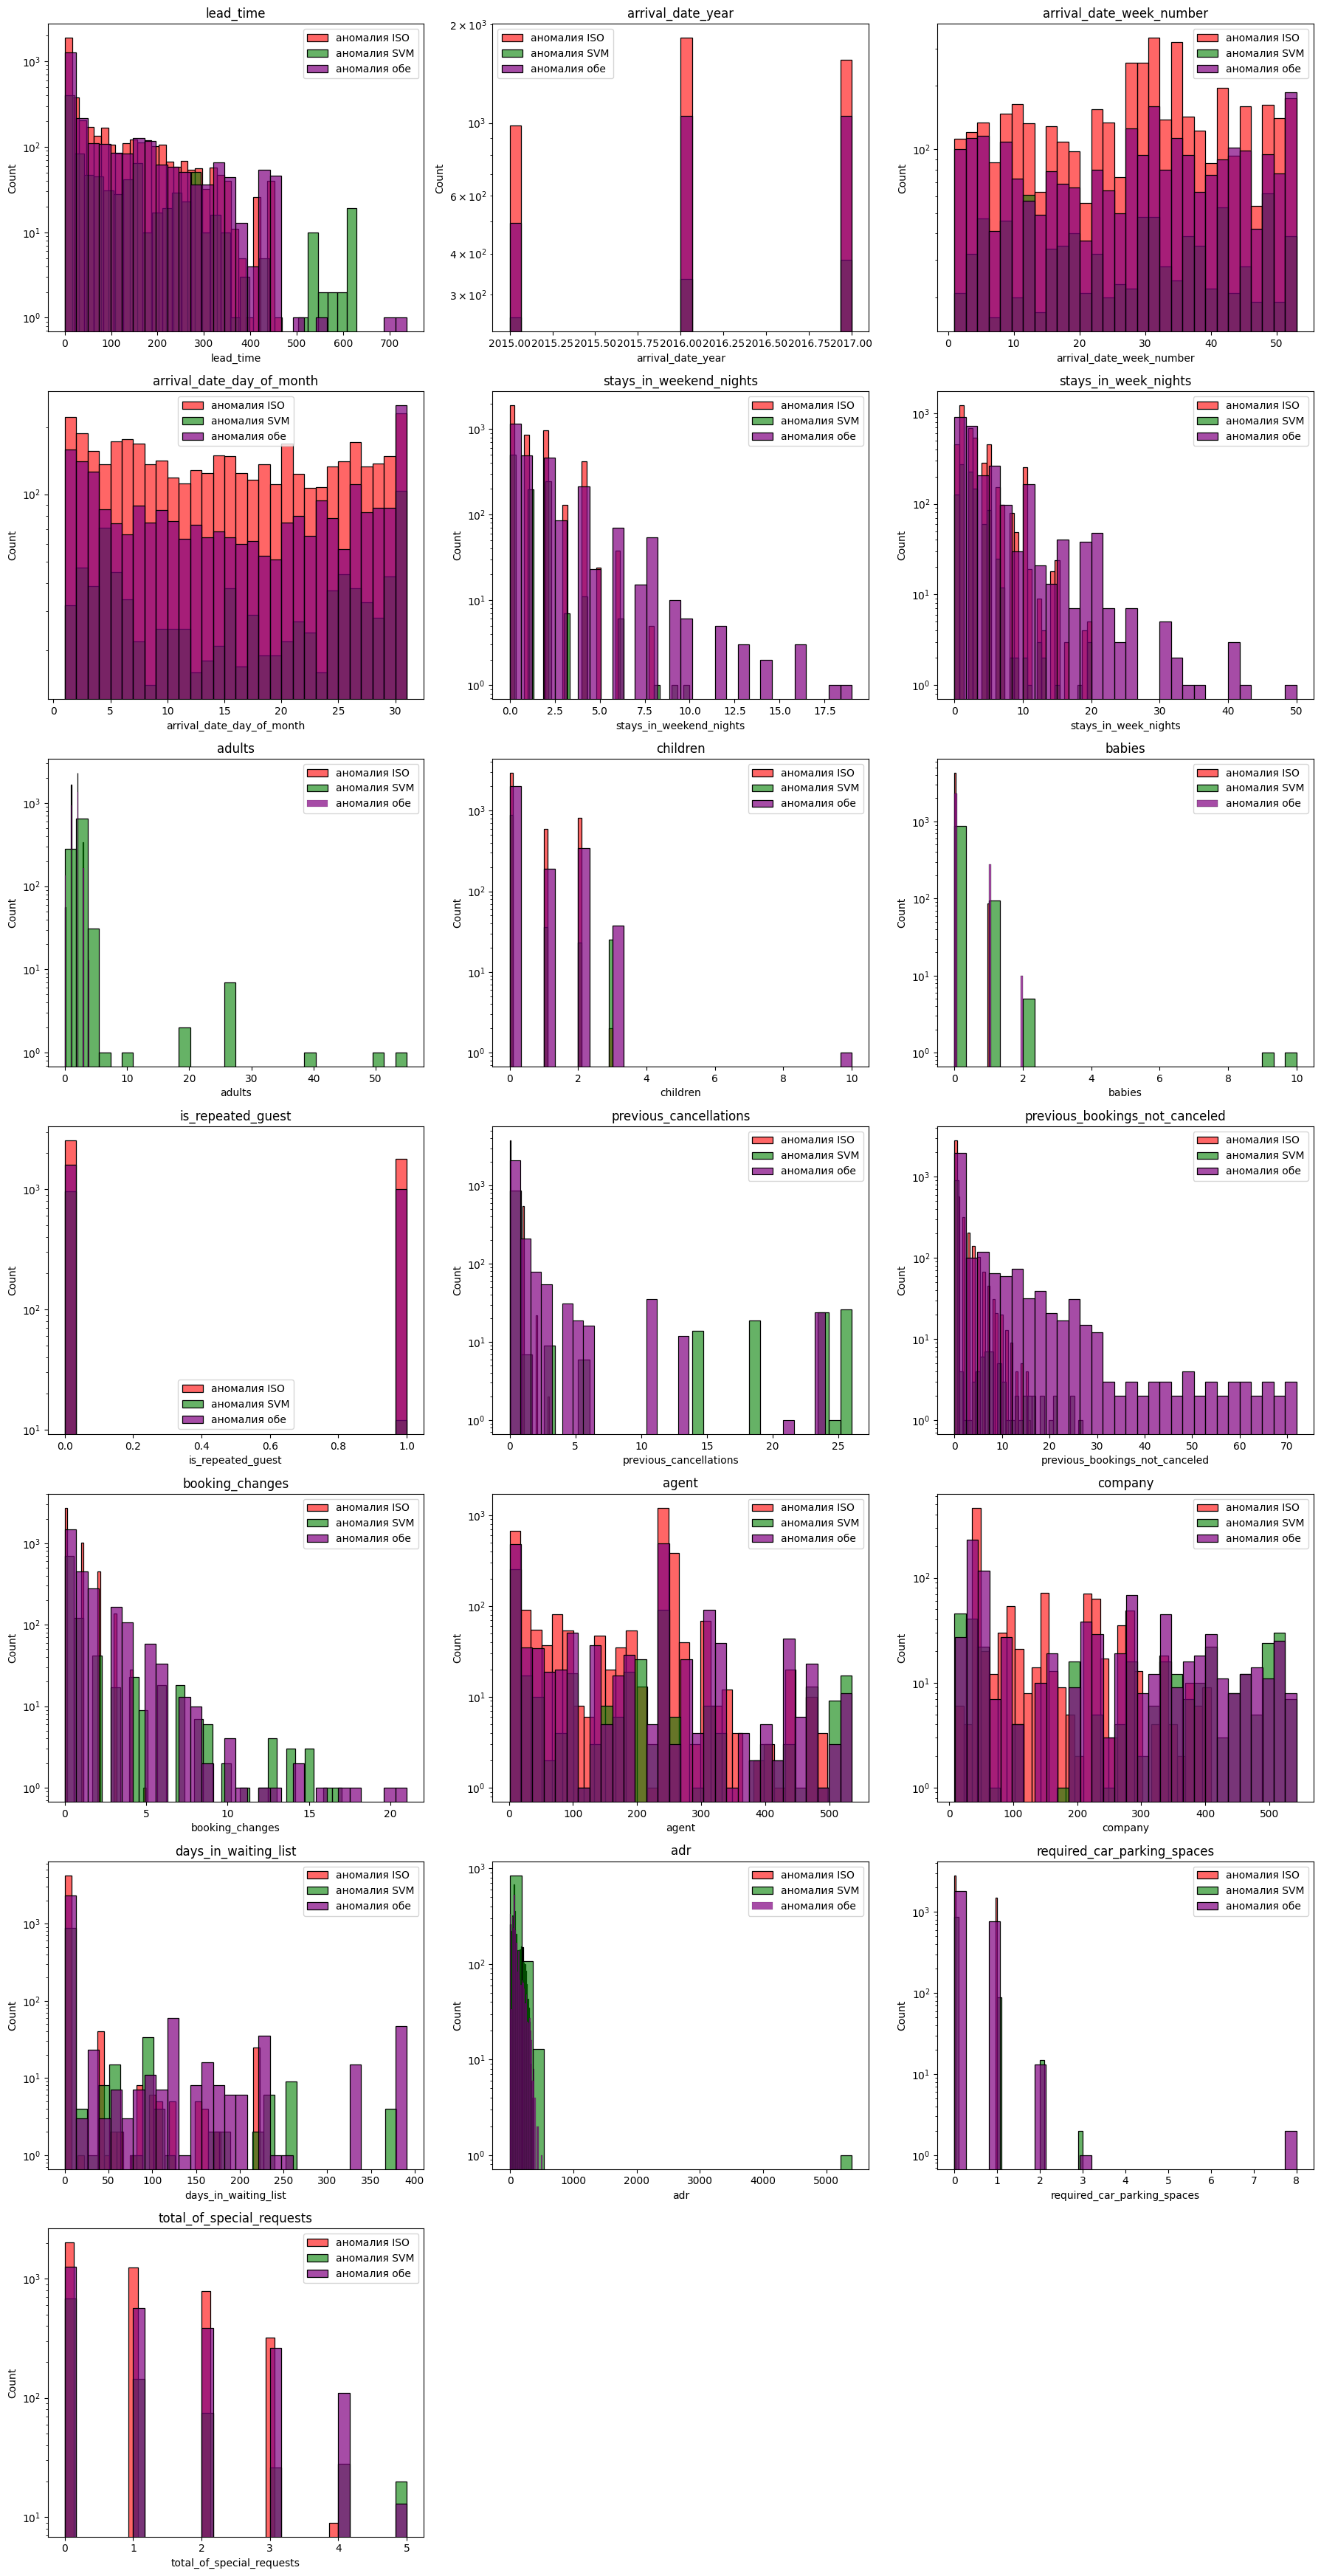

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

cols_to_plot = num_cols  # или конкретные числовые признаки

n_cols = 3
n_rows = math.ceil(len(cols_to_plot) / n_cols)
plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cols_to_plot, 1):
    ax = plt.subplot(n_rows, n_cols, i)

    # normal = df[(df["iso_outlier"] == 0) & (df["svm_outlier"] == 0)][col]
    iso_only = df[(df["iso_outlier"] == 1) & (df["svm_outlier"] == 0)][col]
    svm_only = df[(df["svm_outlier"] == 1) & (df["iso_outlier"] == 0)][col]
    both = df[(df["iso_outlier"] == 1) & (df["svm_outlier"] == 1)][col]

    # sns.histplot(normal, bins=30, color='blue', alpha=0.5, label='норма', ax=ax)
    sns.histplot(iso_only, bins=30, color='red', alpha=0.6, label='аномалия ISO', ax=ax)
    sns.histplot(svm_only, bins=30, color='green', alpha=0.6, label='аномалия SVM', ax=ax)
    sns.histplot(both, bins=30, color='purple', alpha=0.7, label='аномалия обе', ax=ax)

    ax.set_title(f"{col}")
    ax.set_yscale("log")
    ax.legend()

plt.tight_layout()
plt.show()


На временных фичах(lead_time, arrival_date_week_number и др) Isolation Forest более уверенно отмечает аномалии. Выбросом считается точка, которую легко изолировать. С временными фичами как раз длинные хвосты(например, lead_time — люди могут бронировать отель за 1 день и за 100 дней)

 SVM детектит больше на фичах, описывающих кол-во людей(alults, children, babies) детектит аномалии. Пространство признаков с количеством людей часто компактное, большинство бронирований — 1–2 взрослых, 0–2 детей, а SVM как раз проводит границу между большинтвом и остальными.

Обучаем модель на данных, с помеченными аномалиями

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             RocCurveDisplay, ConfusionMatrixDisplay)
from sklearn.preprocessing import OrdinalEncoder


In [ ]:
TARGET = 'is_canceled'

# Удаляем явные утечки
for leak in ['reservation_status', 'reservation_status_date']:
    if leak in df.columns:
        df = df.drop(columns=[leak])

# Разделение признаков по типу
df.replace([np.inf, -np.inf], np.nan, inplace=True)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if TARGET in num_cols:
    num_cols.remove(TARGET)
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print(f"Числовые признаки ({len(num_cols)}): {num_cols[:8]}{'...' if len(num_cols)>8 else ''}")
print(f"Категориальные признаки ({len(cat_cols)}): {cat_cols[:8]}{'...' if len(cat_cols)>8 else ''}")

# Стратифицированный сплит
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Числовые признаки (36): ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children']...
Категориальные признаки (10): ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type']...
Train: (89542, 46) Test: (29848, 46)


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')  # оставшиеся признаки опущены

In [ ]:
def evaluate_model(pipe, X_test, y_test, plot_title_prefix="Model"):
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  AUC: {auc if auc is None else f'{auc:.4f}'}")
    print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

    # ROC
    if y_proba is not None:
        plt.figure()
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f"{plot_title_prefix} — ROC")
        plt.show()

    # # Confusion matrix
    # cm = confusion_matrix(y_test, y_pred)
    # plt.figure()
    # ConfusionMatrixDisplay(cm, display_labels=['not_canceled','canceled']).plot(cmap='Blues', values_format='d')
    # plt.title(f"{plot_title_prefix} — Confusion Matrix")
    # plt.show()

Random Forest обучен — метрики на тесте:
Accuracy: 0.8933  Precision: 0.8910  Recall: 0.8112  F1: 0.8493  AUC: 0.9586

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92     18792
           1       0.89      0.81      0.85     11056

    accuracy                           0.89     29848
   macro avg       0.89      0.88      0.88     29848
weighted avg       0.89      0.89      0.89     29848



<Figure size 640x480 with 0 Axes>

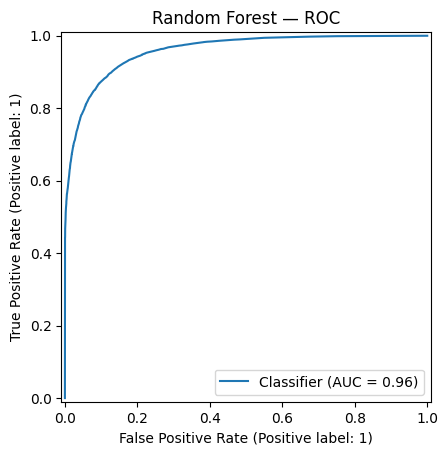

In [ ]:
rf = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced'))
])

# Обучаем
rf.fit(X_train, y_train)
print("Random Forest обучен — метрики на тесте:")
evaluate_model(rf, X_test, y_test, plot_title_prefix="Random Forest")


По сравнению с Бейзлайном у модели вырос Precision, то есть модель стала реже ошибаться в детекции отмен броней. Это произошло потому что мы дали модели информацию об аномальных событиях и она стала к ним относится более осторожно.

Значим улучшений accuracy нет, Recall немного просел.

# Отбор и генерация признаков

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 3.1 MB/s eta 0:00:00


Не очень информат. фичи:

- средняя ставка за ночь. Она сильно зависит от числа людей в номере. Нужно ввести новую фичу средняя плата за ночь / число проживающих
- большое число изменений статуса бронирования, это зависит от того, как часто человек в целом бронил номера. Введем новую фичу: число отмен броней(число отмен броней + число не отмен броней) = число отмен броней / число броней

Также выше на гистограмме можно было увидеть, что lead_time имеет экспоненциальное распределение, поэтому прогогарифмируем его

In [ ]:
import pandas as pd
from scipy.stats import t
import numpy as np
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.base import clone
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict, KFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             RocCurveDisplay, ConfusionMatrixDisplay)

df = pd.read_csv("/content/hotel_bookings.csv")

In [ ]:
df.drop(columns=['reservation_status', 'reservation_status_date'], axis = 1, inplace = True)
df.drop(['agent','company'], axis=1, inplace=True)

mode_children = df['children'].mode()[0]
df['children'] = df['children'].fillna(mode_children)

df = df[~((df.adults == 0) & (df.children == 0) & (df.babies == 0))]

### Добавление цикличности временным признакам

Делать это будем с помощью тригонометричских функций

In [ ]:
month_map = {
    "January": 1, "February": 2, "March": 3,
    "April": 4, "May": 5, "June": 6,
    "July": 7, "August": 8, "September": 9,
    "October": 10, "November": 11, "December": 12
}

tmp = df["arrival_date_month"].map(month_map)

In [ ]:
df["month_sin"] = np.sin(2 * np.pi * tmp / 12)
df["month_cos"] = np.cos(2 * np.pi * tmp / 12)

df["week_sin"] = np.sin(2 * np.pi * df["arrival_date_week_number"] / 53)
df["week_cos"] = np.cos(2 * np.pi * df["arrival_date_week_number"] / 53)

df["day_sin"] = np.sin(2 * np.pi * df["arrival_date_day_of_month"] / 31)
df["day_cos"] = np.cos(2 * np.pi * df["arrival_date_day_of_month"] / 31)

### Генерация новых фич

Логично суммарно иметь представление о проведенных  ночах и суммарном количестве гостей



In [ ]:
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['is_family'] = (df['children'] + df['babies'] > 0).astype(int)
df['prev_cancel_rate'] = df['previous_cancellations'] / (1 + df['previous_bookings_not_canceled'])

И перерасчитать на человека некоторые характеристики

In [ ]:
df['adr_per_person'] = df['adr'] / df["total_guests"]
df['total_previous_bookings'] = df['previous_cancellations'] + df['previous_bookings_not_canceled']
df['cancellation_ratio'] = df['previous_cancellations'] / df['total_previous_bookings']
df['cancellation_ratio'] = df['cancellation_ratio'].fillna(0)

Также в EDA мы заметили лог-нормальность распределения `lead_time`

In [ ]:
df['lead_time'] = np.log(df['lead_time'] + 1)

## Генерация на основе соседей

Можно сгруппировать фичи в 3 группы и добавить 3 новые фичи соответственно.

Здесь логично можно разбить все на данные о компании людей, которая отправляется в поездку, данные о заказе и о брони.

In [ ]:
personal_characteristics = ["country", "lead_time", "adults", "babies", "meal", "market_segment", "distribution_channel", "is_repeated_guest", "previous_cancellations", "previous_bookings_not_canceled", "total_previous_bookings", "cancellation_ratio", "total_guests", "prev_cancel_rate"]
order_characteristics = ["total_nights","hotel", "lead_time", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", "customer_type", "total_of_special_requests", "month_sin", "month_cos", "week_sin", "week_cos", "day_sin", "day_cos"]
booking_characteristics = ["previous_bookings_not_canceled", "reserved_room_type", "assigned_room_type", "booking_changes", "deposit_type" , "days_in_waiting_list", "adr", "required_car_parking_spaces", "adr_per_person"]


num_cols = df.select_dtypes(include=np.number).columns.tolist()
if "is_canceled" in num_cols:
    num_cols.remove("is_canceled")
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
target = "is_canceled"

In [ ]:
def add_proba_by_group(df, num_cols, cat_cols, target, group, group_name = "", model = LogisticRegression, max_iter = 100, n_splits = 5):
    pre = ColumnTransformer([
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols)
    ])

    model_pre = Pipeline([
        ("pre", pre),
        ("clf", model(max_iter = max_iter))
    ])

    X, y = df.drop(columns = [target], axis = 1), df[target]

    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_proba = cross_val_predict(model_pre, X[group], y, cv=skf, method='predict_proba')[:, 1]

    df[f"group_{group_name}_score"] = oof_proba
    model_pre.fit(X[group], y)
    return model_pre

Финальное преобразование категориальных фичей

In [ ]:
def prepare_target_encoded_data(df, num_cols, cat_cols, target_col, te_cols,
                                groups = [personal_characteristics, order_characteristics, booking_characteristics],
                                group_names = ["personal", "order", "booking"], train_size=0.8, random_state=42,
                                model = LogisticRegression, max_iter = 100, n_splits = 5):
    models_group = []
    for group, name in zip(groups, group_names):
        model_group = add_proba_by_group(
                            df,
                            [col for col in group if col in num_cols],
                            [col for col in group if col in cat_cols],
                            target = target_col,
                            group = group,
                            group_name = name,
                            model = model,
                            max_iter = max_iter
        )
        models_group.append(model_group)


    X = df.drop(columns=[target_col])
    y = df[target_col]

    for col in cat_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=train_size, random_state=random_state)

    X_train_inner, X_train_te, y_train_inner, y_train_te = train_test_split(
        X_train, y_train, train_size=0.8, random_state=random_state)

    for col in te_cols:
        te = TargetEncoder()
        te.fit(X_train_te[[col]], y_train_te)
        X_train[col + "_te"] = te.transform(X_train[[col]])
        X_test[col + "_te"] = te.transform(X_test[[col]])


    hotel_mean = df.groupby('hotel')['adr_per_person'].mean()
    room_type_mean = df.groupby('reserved_room_type')['adr_per_person'].mean()

    X_train['hotel'] = X_train['hotel'].map(hotel_mean)
    X_test['hotel'] = X_test['hotel'].map(hotel_mean)

    X_train["reserved_room_type_fe"] = X_train['reserved_room_type'].map(room_type_mean)
    X_test['reserved_room_type_fe'] = X_test['reserved_room_type'].map(room_type_mean)
    return X_train, X_test, y_train, y_test, models_group





te_cols = ["deposit_type"]
X_train, X_test, y_train, y_test, models_group = prepare_target_encoded_data(df,
                                                                             num_cols,
                                                                             cat_cols,
                                                                             target,
                                                                             te_cols,
                                                                             max_iter = 300)

### Проверки

In [ ]:
def evaluate_model(pipe, X_test, y_test, plot_title_prefix="Model"):
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    print(f"Accuracy: {acc:.4f}  Precision: {prec:.4f}  Recall: {rec:.4f}  F1: {f1:.4f}  AUC: {auc if auc is None else f'{auc:.4f}'}")
    print("\nClassification report:\n", classification_report(y_test, y_pred, zero_division=0))

    # ROC
    if y_proba is not None:
        plt.figure()
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f"{plot_title_prefix} — ROC")
        plt.show()

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ord', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_cols),
    ('cat', categorical_transformer, cat_cols)
], remainder='drop')

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


Random Forest обучен — метрики на тесте:
Accuracy: 0.8871  Precision: 0.8900  Recall: 0.7952  F1: 0.8400  AUC: 0.9541

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.91     14958
           1       0.89      0.80      0.84      8884

    accuracy                           0.89     23842
   macro avg       0.89      0.87      0.88     23842
weighted avg       0.89      0.89      0.89     23842



<Figure size 640x480 with 0 Axes>

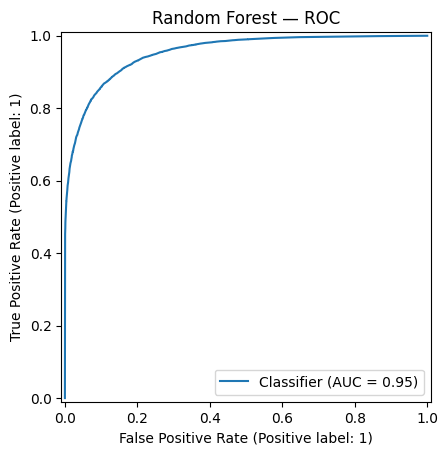

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1, class_weight='balanced'))
])

rf.fit(X_train, y_train)
print("Random Forest обучен — метрики на тесте:")
evaluate_model(rf, X_test, y_test, plot_title_prefix="Random Forest")

# Интерпретация и диагностика моделей

## Интерпретация моделей

In [ ]:
!pip install shap lime

import shap
import lime
import lime.lime_tabular

In [ ]:
!pip install shap lime

import shap
import lime
import lime.lime_tabular

In [ ]:
X_train_proc_array = preprocessor.fit_transform(X_train)
X_test_proc_array = preprocessor.transform(X_test)

feature_names = preprocessor.get_feature_names_out()

feature_names

/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:572: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


array(['num__lead_time', 'num__arrival_date_year',
       'num__arrival_date_week_number', 'num__arrival_date_day_of_month',
       'num__stays_in_weekend_nights', 'num__stays_in_week_nights',
       'num__adults', 'num__children', 'num__babies',
       'num__is_repeated_guest', 'num__previous_cancellations',
       'num__previous_bookings_not_canceled', 'num__booking_changes',
       'num__days_in_waiting_list', 'num__adr',
       'num__required_car_parking_spaces',
       'num__total_of_special_requests', 'num__month_sin',
       'num__month_cos', 'num__week_sin', 'num__week_cos', 'num__day_sin',
       'num__day_cos', 'num__total_nights', 'num__total_guests',
       'num__is_family', 'num__prev_cancel_rate', 'num__adr_per_person',
       'num__total_previous_bookings', 'num__cancellation_ratio',
       'cat__hotel', 'cat__arrival_date_month', 'cat__meal',
       'cat__country', 'cat__market_segment', 'cat__distribution_channel',
       'cat__reserved_room_type', 'cat__assigned_room_

In [ ]:
X_train_proc = pd.DataFrame(X_train_proc_array, columns=feature_names)
X_test_proc = pd.DataFrame(X_test_proc_array, columns=feature_names)

print("Размер обработанных данных:", X_train_proc.shape)

Размер обработанных данных: (95368, 40)


Строим SHAP для Logistic Regression...


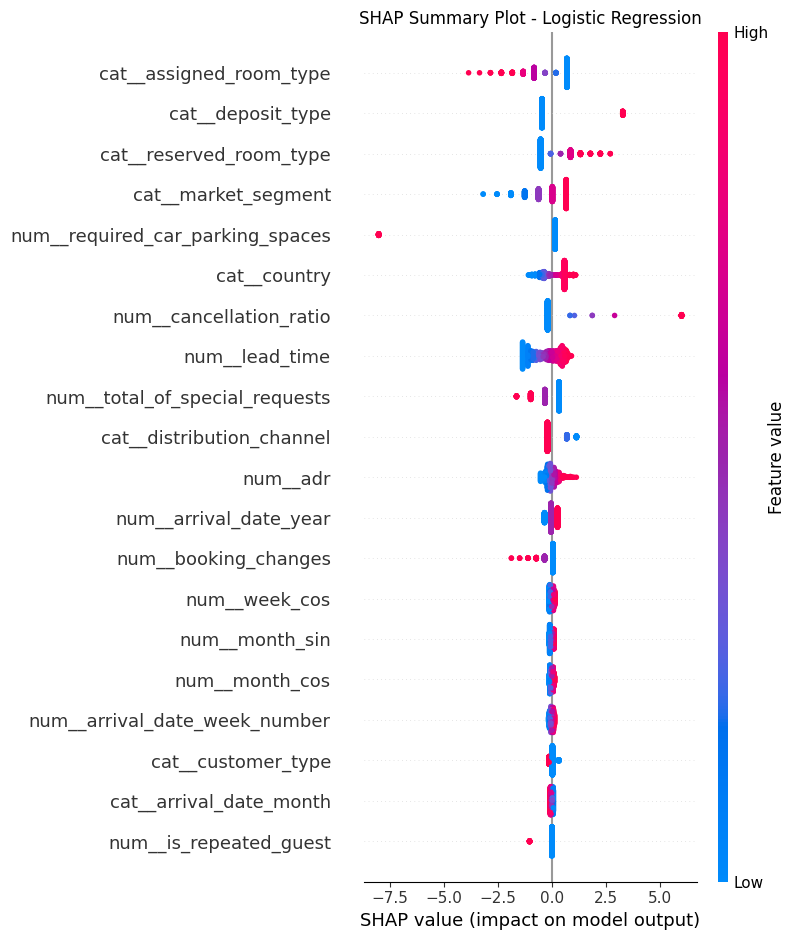

Строим SHAP для Random Forest...
Формат массива SHAP: (750, 40, 2)


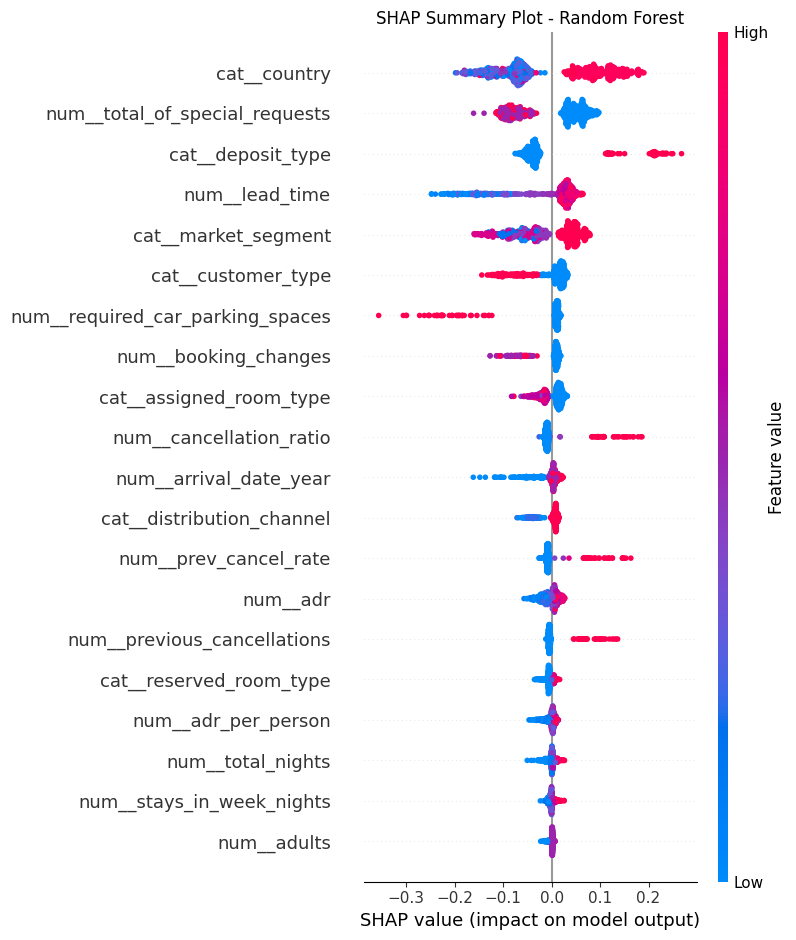

In [ ]:
lr_model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42, n_jobs=-1)
lr_model.fit(X_train_proc, y_train)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight='balanced', random_state=42, n_jobs=-1)
rf_model.fit(X_train_proc, y_train)

print("Строим SHAP для Logistic Regression...")
masker = shap.maskers.Independent(data=X_train_proc)
explainer_lr = shap.LinearExplainer(lr_model, masker=masker)
# считаем интерпретации на ограниченном наборе данных
X_test_sample = X_test_proc.sample(750, random_state=42)
shap_values_lr = explainer_lr.shap_values(X_test_sample)

plt.figure()
plt.title("SHAP Summary Plot - Logistic Regression")
shap.summary_plot(shap_values_lr, X_test_sample, show=True)


print("Строим SHAP для Random Forest...")
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test_sample)


print(f"Формат массива SHAP: {shap_values_rf.shape}")
vals_rf = shap_values_rf[:, :, 1]

plt.figure()
plt.title("SHAP Summary Plot - Random Forest")
shap.summary_plot(vals_rf, X_test_sample, show=True)

In [ ]:
def get_top_features(shap_vals, feature_names, n=10):
    if isinstance(shap_vals, np.ndarray) and len(shap_vals.shape) == 3:
        vals = np.abs(shap_vals[:, :, 1]).mean(0)

    else:
        vals = np.abs(shap_vals).mean(0)

    feature_importance = pd.DataFrame(list(zip(feature_names, vals)), columns=['col_name','feature_importance_vals'])
    feature_importance.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
    return feature_importance.head(n)

top_lr = get_top_features(shap_values_lr, X_test_sample.columns)
top_rf = get_top_features(shap_values_rf, X_test_sample.columns)

print("--- TOP-10 признаков Logistic Regression ---")
display(top_lr)
print("\n--- TOP-10 признаков Random Forest ---")
display(top_rf)

--- TOP-10 признаков Logistic Regression ---


col_name  feature_importance_vals
37           cat__assigned_room_type                 0.842243
38                 cat__deposit_type                 0.787011
36           cat__reserved_room_type                 0.682291
34               cat__market_segment                 0.641505
15  num__required_car_parking_spaces                 0.593236
33                      cat__country                 0.537620
29           num__cancellation_ratio                 0.492930
0                     num__lead_time                 0.478895
16    num__total_of_special_requests                 0.441425
35         cat__distribution_channel                 0.304214


--- TOP-10 признаков Random Forest ---


col_name  feature_importance_vals
33                      cat__country                 0.095199
16    num__total_of_special_requests                 0.064048
38                 cat__deposit_type                 0.058635
0                     num__lead_time                 0.055919
34               cat__market_segment                 0.054408
39                cat__customer_type                 0.030006
15  num__required_car_parking_spaces                 0.022052
12              num__booking_changes                 0.020369
37           cat__assigned_room_type                 0.018128
29           num__cancellation_ratio                 0.015972

Истинный класс: 0

--- LIME Explanation ---


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


[('cat__deposit_type <= 0.00', -0.22315565671361365), ('num__required_car_parking_spaces <= -0.25', 0.14233676939926562), ('num__prev_cancel_rate <= -0.10', -0.13606151426104587), ('num__cancellation_ratio <= -0.23', -0.10188488901038574), ('cat__customer_type > 2.00', -0.08438449460732005), ('num__previous_cancellations <= -0.10', -0.06154424338194406), ('cat__market_segment <= 4.00', -0.049941583844213405), ('num__arrival_date_year <= -0.22', -0.02697946910826363), ('num__previous_bookings_not_canceled <= -0.09', 0.02307708708796141), ('num__babies <= -0.08', -0.020809301487871138)]

--- SHAP Waterfall Plot ---


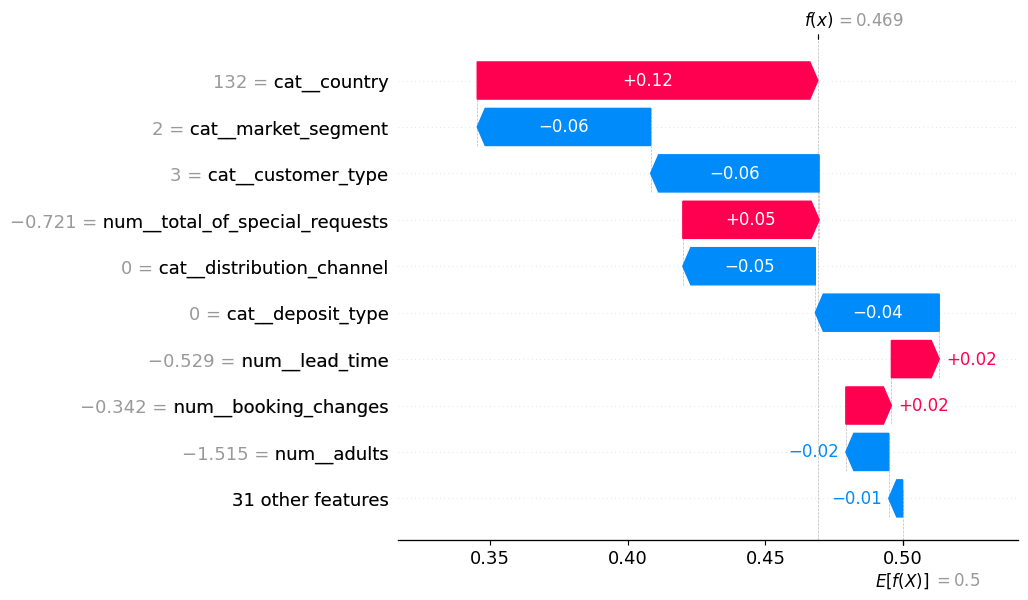

In [ ]:
# Выбираем одно наблюдение
idx_sample = 10
instance = X_test_sample.iloc[idx_sample]
instance_values = instance.values
print(f"Истинный класс: {y_test.iloc[X_test_sample.index[idx_sample]]}")

print("\n--- LIME Explanation ---")

explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_proc),
    feature_names=feature_names,
    class_names=['Not Canceled', 'Canceled'],
    mode='classification'
)

exp = explainer_lime.explain_instance(
    data_row=instance_values,
    predict_fn=rf_model.predict_proba
)
exp.show_in_notebook(show_table=True)
print(exp.as_list())

print("\n--- SHAP Waterfall Plot ---")

shap_val_instance = shap_values_rf[idx_sample, :, 1]

if isinstance(explainer_rf.expected_value, np.ndarray) and len(explainer_rf.expected_value) > 1:
    base_val_instance = explainer_rf.expected_value[1]
else:
    base_val_instance = explainer_rf.expected_value

shap.waterfall_plot(
    shap.Explanation(values=shap_val_instance,
                     base_values=base_val_instance,
                     data=instance_values,
                     feature_names=feature_names)
)

Согласно SHAP, основным фактором, повышающим вероятность отмены, является страна (cat_country), тогда как сегмент рынка и тип клиента выступают главными сдерживающими факторами. В отличие от него, LIME определяет тип депозита (cat_deposit_type) как ключевой аргумент в пользу того, что бронь не будет отменена, а страну в топе вообще не выделяет. Зато он считает required_car_parking_spaces главным фактором отмены.

Несмотря на расхождения в ранжировании важности признаков, оба метода приходят к идентичному финальному выводу: вероятность отмены составляет около 47% (пограничное значение, склоняющееся к сохранению брони).

Различие объясняется разной природой методов: SHAP оценивает вклад признака с учетом всех взаимосвязей, тогда как LIME строит простую линейную модель только в локальной окрестности данного наблюдения.

## SHAP-эмбеддинги и анализ сдвигов

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

N_TRAIN_SAMPLES = 5000
N_TEST_SAMPLES = 2000
X_train_sample = X_train_proc.sample(n=min(N_TRAIN_SAMPLES, len(X_train_proc)), random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]

X_test_sample = X_test_proc.sample(n=min(N_TEST_SAMPLES, len(X_test_proc)), random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

print(f"Работаем с сэмплами: Train {X_train_sample.shape}, Test {X_test_sample.shape}")
def get_shap_embeddings(model, X_data):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_data, check_additivity=False)

    if isinstance(shap_values, list):
        return shap_values[1]
    elif len(shap_values.shape) == 3:
        return shap_values[:, :, 1]
    else:
        return shap_values

print("Генерация SHAP-эмбеддингов для сэмплов...")
shap_train_sample = get_shap_embeddings(rf_model, X_train_sample)
shap_test_sample = get_shap_embeddings(rf_model, X_test_sample)

print(f"SHAP embeddings ready: {shap_train_sample.shape}")

Работаем с сэмплами: Train (5000, 40), Test (2000, 40)
Генерация SHAP-эмбеддингов для сэмплов...
SHAP embeddings ready: (5000, 40)


In [ ]:
iso = IsolationForest(contamination=0.05, random_state=42, n_jobs=-1)
outliers_mask = iso.fit_predict(shap_train_sample)

# Фильтруем данные (оставляем только "нормальные" = 1)
mask_clean = outliers_mask == 1
X_train_clean = X_train_sample[mask_clean]
y_train_clean = y_train_sample[mask_clean]

print(f"Выбросов найдено: {np.sum(outliers_mask == -1)}")

# 2. Сравниваем честно: Модель на грязном сэмпле vs Модель на чистом сэмпле
# (чтобы объем данных не влиял, параметры берем одинаковые и простые)

# Базовая модель (на сэмпле с шумом)
rf_dirty = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42, class_weight='balanced')
rf_dirty.fit(X_train_sample, y_train_sample)

# Очищенная модель
rf_clean = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42, class_weight='balanced')
rf_clean.fit(X_train_clean, y_train_clean)

# Оценка на отложенном тестовом сэмпле
print("\n--- Результаты очистки данных (на основе SHAP) ---")
f1_dirty = f1_score(y_test_sample, rf_dirty.predict(X_test_sample))
f1_clean = f1_score(y_test_sample, rf_clean.predict(X_test_sample))

print(f"F1 (Dirty Sample): {f1_dirty:.4f}")
print(f"F1 (Clean Sample): {f1_clean:.4f}")
print(f"Изменение: {f1_clean - f1_dirty:+.4f}")

Выбросов найдено: 250

--- Результаты очистки данных (на основе SHAP) ---
F1 (Dirty Sample): 0.7411
F1 (Clean Sample): 0.7470
Изменение: +0.0058


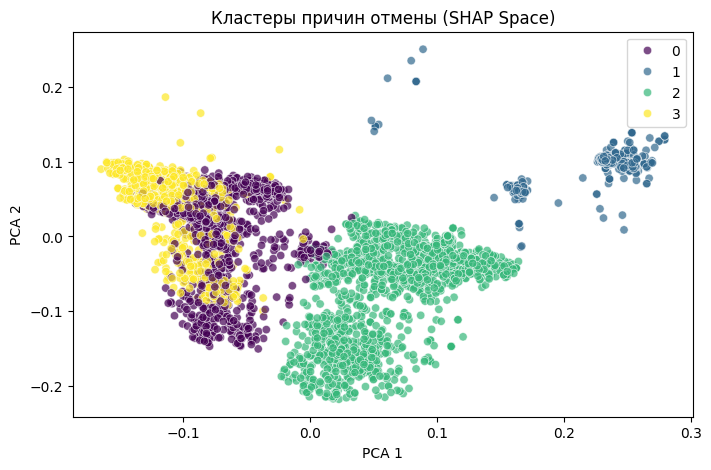

Чем отличаются кластеры (средний SHAP-вклад признака):



--- Влияние кластеризации ---
F1 (Без кластеров): 0.7411
F1 (С фичей кластера): 0.7583
Прирост: +0.0172


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
shap_pca = pca.fit_transform(shap_train_sample)

# Кластеризация (K-Means)
# k=4 выберем эвристически
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_train = kmeans.fit_predict(shap_train_sample)
# Проецируем кластеры на тест (используя центроиды трейна)
clusters_test = kmeans.predict(shap_test_sample)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=shap_pca[:, 0], y=shap_pca[:, 1], hue=clusters_train, palette='viridis', alpha=0.7)
plt.title("Кластеры причин отмены (SHAP Space)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Создаем DataFrame с SHAP значениями и меткой кластера
df_shap_intepr = pd.DataFrame(shap_train_sample, columns=X_train_sample.columns)
df_shap_intepr['Cluster'] = clusters_train

print("Чем отличаются кластеры (средний SHAP-вклад признака):")
# Группируем и смотрим топ отличий
mean_shap = df_shap_intepr.groupby('Cluster').mean()
# Сортируем признаки по стандартному отклонению между кластерами (самые разные)
top_diff_feats = mean_shap.std().sort_values(ascending=False).head(5).index
display(mean_shap[top_diff_feats].style.background_gradient(cmap='coolwarm', axis=0))


# Проверка: Дает ли фича 'Cluster' прирост?
X_train_clustered = X_train_sample.copy()
X_train_clustered['shap_cluster'] = clusters_train

X_test_clustered = X_test_sample.copy()
X_test_clustered['shap_cluster'] = clusters_test

# Обучаем модель с новой фичей
rf_w_cluster = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42, class_weight='balanced')
rf_w_cluster.fit(X_train_clustered, y_train_sample)

f1_cluster = f1_score(y_test_sample, rf_w_cluster.predict(X_test_clustered))

print("\n--- Влияние кластеризации ---")
print(f"F1 (Без кластеров): {f1_dirty:.4f}")
print(f"F1 (С фичей кластера): {f1_cluster:.4f}")
print(f"Прирост: {f1_cluster - f1_dirty:+.4f}")

Очистка данных от примеров с аномальной логикой принятия решений (выбросы в пространстве SHAP) позволила немного стабилизировать модель, дав прирост +0.6% к F1-мере. Однако гораздо больший эффект дала кластеризация поведения (+1.7%): добавление информации о том, к какой группе риска относится клиент (например, «Кластер 1» с высоким риском из-за типа депозита или «Кластер 3» с низким риском из-за страны), помогло модели лучше обобщать данные.

Но, из интересного наблюдения, при увеличении выборок в два раза, эффекты сильно падали и даже становились отрицательными

Это происходит потому что с увеличением выборок модель становится устойчивее, сама находит скрытые взаимосвязи, а также с увеличением количества данных модель сама по себе становится ближе к своему потолку качества (мы лучше апроксимируем истинное распределение которое предсказываем)

## Shapley Flow

In [ ]:
import shap
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [ ]:
import shap
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Вариант А: Только исходные признаки
X_orig = X_train_sample.copy()

# Вариант Б: Только SHAP-эмбеддинги (по сути, мы учим модель на "мнениях" другой модели)
X_shap = pd.DataFrame(shap_train_sample, columns=X_train_sample.columns, index=X_train_sample.index)

# Вариант В: Конкатенация (Исходные + SHAP)
X_concat = pd.concat([X_orig, X_shap.add_suffix('_shap')], axis=1)

print(f"Размерности: Orig {X_orig.shape}, SHAP {X_shap.shape}, Concat {X_concat.shape}")

model_cv = RandomForestClassifier(n_estimators=50, max_depth=8, random_state=42, class_weight='balanced')
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

results = {}

for name, data in zip(['Original', 'SHAP-only', 'Concatenated'], [X_orig, X_shap, X_concat]):
    pipe = make_pipeline(StandardScaler(), model_cv)
    scores = cross_val_score(pipe, data, y_train_sample, cv=skf, scoring='f1')
    results[name] = scores.mean()
    print(f"Модель: {name:<15} | F1 Score: {scores.mean():.4f}")


print("\n--- Анализ связи Признак -> Его SHAP-значение ---")
correlations = []
for col in X_orig.columns:
    # Корреляция Спирмена (нелинейная монотонная связь)
    corr = X_orig[col].corr(X_shap[col], method='spearman')
    correlations.append((col, corr))

df_flow = pd.DataFrame(correlations, columns=['Feature', 'Correlation']).sort_values(by='Correlation')

print("\nТоп-5 признаков с НЕОБЫЧНОЙ связью (низкая или отрицательная корреляция):")
print("(Это кандидаты на 'сдвиги' или сложное нелинейное влияние)")
display(df_flow.head(5))

print("\nТоп-5 признаков с ПРЯМОЙ связью (высокая корреляция):")
display(df_flow.tail(5))

# Финальная проверка на отложенном тесте (Validation)
# Возьмем лучшую конфигурацию и проверим на X_test_sample
best_mode = max(results, key=results.get)
print(f"\nЛучшая конфигурация на CV: {best_mode}")

if best_mode == 'Concatenated':
    X_train_fin = pd.concat([X_orig, X_shap.add_suffix('_shap')], axis=1)
    X_test_shap = pd.DataFrame(shap_test_sample, columns=X_test_sample.columns, index=X_test_sample.index)
    X_test_fin = pd.concat([X_test_sample, X_test_shap.add_suffix('_shap')], axis=1)
elif best_mode == 'SHAP-only':
    X_train_fin = X_shap
    X_test_fin = pd.DataFrame(shap_test_sample, columns=X_test_sample.columns, index=X_test_sample.index)
else:
    X_train_fin = X_orig
    X_test_fin = X_test_sample

# Обучаем финальную модель
rf_final = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_final.fit(X_train_fin, y_train_sample)
y_pred_final = rf_final.predict(X_test_fin)

print(f"Финальный F1 на отложенном тесте ({best_mode}): {f1_score(y_test_sample, y_pred_final):.4f}")

Размерности: Orig (5000, 40), SHAP (5000, 40), Concat (5000, 80)
Модель: Original        | F1 Score: 0.7663
Модель: SHAP-only       | F1 Score: 0.8178
Модель: Concatenated    | F1 Score: 0.8161

--- Анализ связи Признак -> Его SHAP-значение ---

Топ-5 признаков с НЕОБЫЧНОЙ связью (низкая или отрицательная корреляция):
(Это кандидаты на 'сдвиги' или сложное нелинейное влияние)


/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


Feature  Correlation
16  num__total_of_special_requests    -0.832155
37         cat__assigned_room_type    -0.811254
31         cat__arrival_date_month    -0.805187
12            num__booking_changes    -0.624865
39              cat__customer_type    -0.564639


Топ-5 признаков с ПРЯМОЙ связью (высокая корреляция):


Feature  Correlation
34        cat__market_segment     0.799109
5   num__stays_in_week_nights     0.803557
23          num__total_nights     0.879020
14                   num__adr     0.919236
30                 cat__hotel          NaN


Лучшая конфигурация на CV: SHAP-only
Финальный F1 на отложенном тесте (SHAP-only): 0.7876


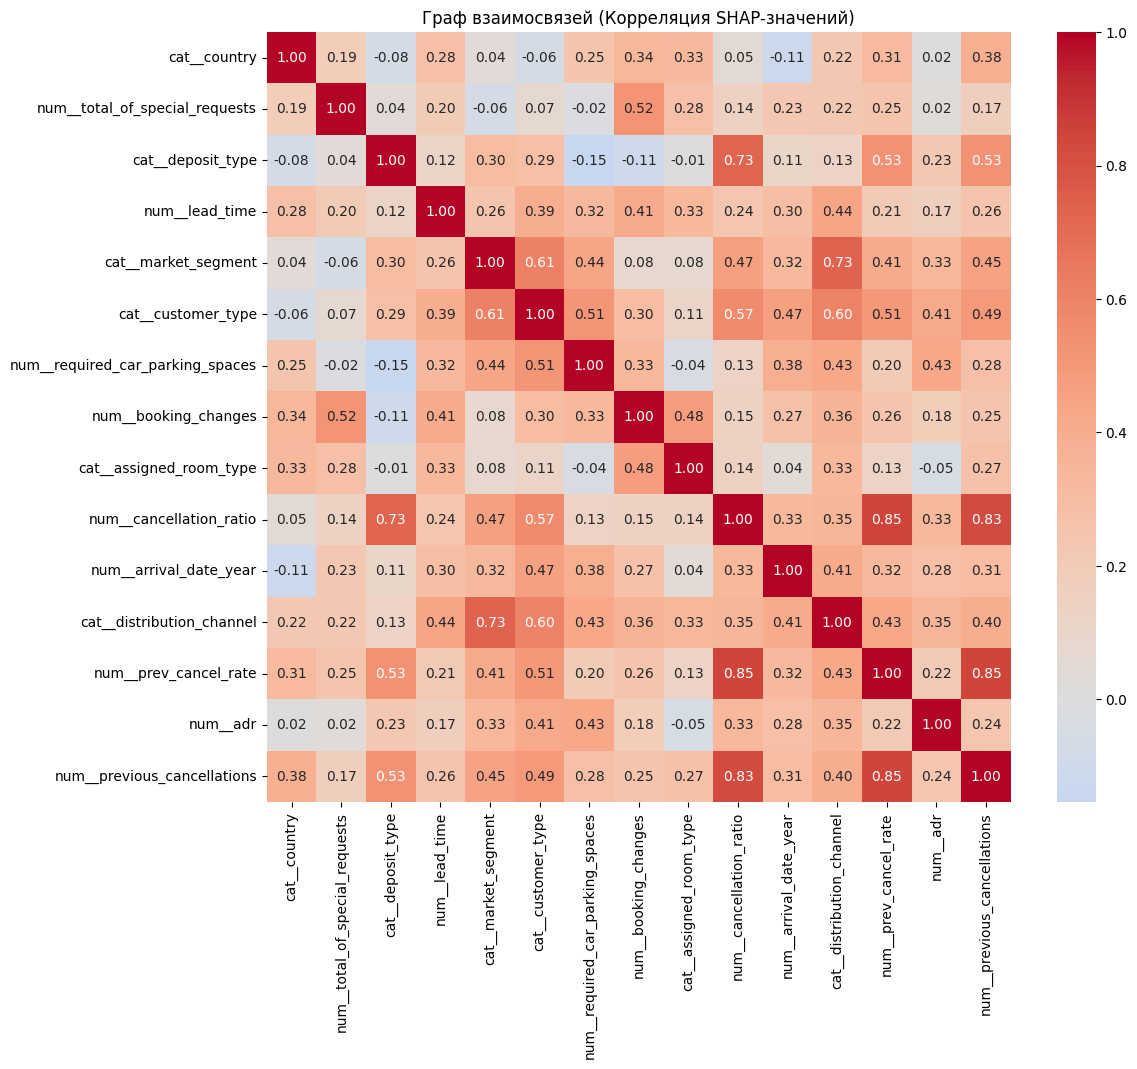


--- Повторная кластеризация (Shapley Flow) ---
Silhouette Score (на SHAP-эмбеддингах): 0.2992

Интерпретация кластеров Shapley Flow (Топ отличий):



--- Анализ аномалий (Shapley Flow) ---
Найдено аномалий поведения: 250 (из 5000)
F1 Score после Shapley Flow очистки: 0.7886
Для сравнения (SHAP-only без очистки): 0.8178
Для сравнения (Original Baseline): 0.7663


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score

df_shap_flow = pd.DataFrame(shap_train_sample, columns=feature_names)

# Строим матрицу корреляций МЕЖДУ ВЛИЯНИЯМИ признаков
plt.figure(figsize=(12, 10))
top_features = df_shap_flow.abs().mean().sort_values(ascending=False).head(15).index
corr_matrix = df_shap_flow[top_features].corr(method='spearman')

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, cbar=True)
plt.title("Граф взаимосвязей (Корреляция SHAP-значений)")
plt.show()

print("\n--- Повторная кластеризация (Shapley Flow) ---")
kmeans_flow = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_flow = kmeans_flow.fit_predict(df_shap_flow)

sil_score_flow = silhouette_score(df_shap_flow, clusters_flow)
print(f"Silhouette Score (на SHAP-эмбеддингах): {sil_score_flow:.4f}")

df_shap_flow['Flow_Cluster'] = clusters_flow
print("\nИнтерпретация кластеров Shapley Flow (Топ отличий):")
means_flow = df_shap_flow.groupby('Flow_Cluster').mean()
top_diff = means_flow.std().sort_values(ascending=False).head(5).index
display(means_flow[top_diff].style.background_gradient(cmap='coolwarm', axis=0))


print("\n--- Анализ аномалий (Shapley Flow) ---")
iso_flow = IsolationForest(contamination=0.05, random_state=42, n_jobs=-1)
outliers_flow = iso_flow.fit_predict(df_shap_flow.drop(columns=['Flow_Cluster']))

n_outliers = np.sum(outliers_flow == -1)
print(f"Найдено аномалий поведения: {n_outliers} (из {len(df_shap_flow)})")

# Проверка качества "очищенной" модели Shapley Flow
mask_clean_flow = outliers_flow == 1
X_shap_clean = df_shap_flow.drop(columns=['Flow_Cluster'])[mask_clean_flow]
y_train_clean_flow = y_train_sample[mask_clean_flow]

# Обучаем модель только на чистых SHAP-эмбеддингах
rf_flow_clean = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, class_weight='balanced')
rf_flow_clean.fit(X_shap_clean, y_train_clean_flow)

# Тестируем на отложенном тесте (преобразованном в SHAP)
X_test_shap_df = pd.DataFrame(shap_test_sample, columns=feature_names)
f1_flow_final = f1_score(y_test_sample, rf_flow_clean.predict(X_test_shap_df))

print(f"F1 Score после Shapley Flow очистки: {f1_flow_final:.4f}")
print(f"Для сравнения (SHAP-only без очистки): {results['SHAP-only']:.4f}")
print(f"Для сравнения (Original Baseline): {results['Original']:.4f}")

Да, характер аномалий изменился, если раньше это были просто выбросы в данных, то теперь это устойчивые отклонения, удаление которых ухудшает метрики



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("--- Проверка гипотезы: Кластеризация на ИСХОДНЫХ данных ---")

kmeans_raw = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters_raw = kmeans_raw.fit_predict(X_orig)

sil_score_raw = silhouette_score(X_orig, clusters_raw)

print(f"Silhouette Score (на ИСХОДНЫХ данных): {sil_score_raw:.4f}")

print(f"Silhouette Score (на SHAP-эмбеддингах): {sil_score_flow:.4f}")
diff = sil_score_flow - sil_score_raw
print(f"Разница: {diff:+.4f} (Чем выше, тем лучше разделились группы)")

--- Проверка гипотезы: Кластеризация на ИСХОДНЫХ данных ---
Silhouette Score (на ИСХОДНЫХ данных): 0.6431
Silhouette Score (на SHAP-эмбеддингах): 0.2992
Разница: -0.3439 (Чем выше, тем лучше разделились группы)


Несмотря на то, что исходные данные кластеризуются "плотнее" (Silhouette 0.64), эта кластеризация носит поверхностный характер (группировка по очевидным признакам). Кластеризация в пространстве SHAP (Silhouette 0.30) выделяет более сложные, нелинейные паттерны поведения (группы риска).
Доказательство полезности: Модель, обученная на SHAP-представлении (Shapley Flow), показала значительный прирост качества (F1 0.82 против 0.76), что подтверждает: "поведенческие" признаки гораздо информативнее для прогноза, чем "анкетные" данные, даже если их сложнее разделить на простые кучки.

Кластеризация в пространстве SHAP выделила четкие группы риска (например, "проблемные депозиты" vs "надежные страны").

Дополнительная фильтрация аномалий на этом этапе вредна — модель на полных SHAP-эмбеддингах работает лучше всего.

Обучение на SHAP-эмбеддингах (подход Shapley Flow) дало лучший результат F1≈0.82 против 0.77 у базовой модели. Это доказывает, что использование «объяснений» модели (SHAP values) в качестве признаков позволяет отфильтровать шум и уловить истинные причинно-следственные связи лучше, чем сырые данные.